# Setup

In [8]:
import torch

if 'google.colab' in str(get_ipython()):
  print('Running on Colab')
  running_on_colab = True
else:
  print('Not running on Colab')
  running_on_colab = False

if running_on_colab:
    print(torch.__version__)
    !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
    !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
    !pip install -q git+https://github.com/snap-stanford/deepsnap.git
    !pip install pyarrow
    !pip install fastparquet

    from google.colab import drive
    drive.mount('/content/drive')
    filepath = '/content/drive/MyDrive/GCNN/'
    data_folder = filepath+"graph_data/"
    experiments_folder = filepath+"experiments/merged_types_experiments/"

    import sys
    sys.path.append(filepath + "run_in_colab")

else:
    data_folder = "../../../data/processed/graph_data_nohubs/merged_types/"
    experiments_folder = "../../../data/experiments/design_space_merged_experiment/seed_0/"

Not running on Colab


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import plotly.express as px

import sys
sys.path.append("../../..")
from src.models import training_utils, base_model

# Load data

In [43]:
results = pd.read_parquet(experiments_folder+"experiment_16_06_23__17_59_43.parquet")
filter_columns = ['post_process_layers', 'normalize_output', 'msg_passing_layers', 'micro_aggregation', 'macro_aggregation', 'L2_norm',
                  'pre_process_layers', 'hidden_channels', 'feature_type', 'feature_dim', 'conv_type', 'layer_connectivity', 'jumping_knowledge']
df = results[filter_columns]
# node_data = load_node_csv(data_folder+"nohub_graph_nodes.csv","node_index","node_type")
# train_data, val_data = load_data(data_folder+"split_dataset/")

# Explore results

In [60]:
df = results[['L2_norm','batch_norm', 'conv_type', 'feature_dim', 'feature_type', 'hidden_channels',
       'layer_connectivity',"jumping_knowledge", 'macro_aggregation', 'micro_aggregation',
       'msg_passing_layers', 'post_process_layers',
       'pre_process_layers', 'auc','experiment_name']]


In [61]:
df.sort_values(by="auc",ascending=False)

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
62     True        True  SAGEConv           10         ones               32   
55     True        True  SAGEConv           10         ones               32   
54     True        True  SAGEConv           10         ones               32   
59     True        True  SAGEConv           10         ones               32   
9      True        True  SAGEConv           10         ones               32   
..      ...         ...       ...          ...          ...              ...   
32     True        True  SAGEConv           10         ones               32   
17     True        True  SAGEConv           10         ones               32   
14     True        True  SAGEConv           10         ones               32   
35     True        True  SAGEConv           10         ones               32   
16     True        True  SAGEConv           10         ones               32   

   layer_connectivity  jumping_knowledge macro_aggregation micro_aggregation  \
62               None               True               sum               sum   
55               None              False               sum               sum   
54               None              False               sum               sum   
59            skipsum              False               sum               sum   
9                None              False               sum               sum   
..                ...                ...               ...               ...   
32               None              False              mean               max   
17               None              False               max               max   
14               None              False              mean               max   
35               None              False               max               max   
16               None              False               max              mean   

    msg_passing_layers  post_process_layers  pre_process_layers       auc  \
62                   2                    1                   0  0.909951   
55                   3                    1                   0  0.909892   
54                   2                    1                   0  0.909118   
59                   3                    1                   0  0.909058   
9                    2                    1                   0  0.908880   
..                 ...                  ...                 ...       ...   
32                   2                    1                   0  0.821747   
17                   2                    1                   0  0.816867   
14                   2                    1                   0  0.815617   
35                   2                    1                   0  0.797107   
16                   2                    1                   0  0.594751   

        experiment_name  
62  layers_connectivity  
55  layers_connectivity  
54  layers_connectivity  
59  layers_connectivity  
9        sage_aggr_type  
..                  ...  
32        GAT_aggr_type  
17       sage_aggr_type  
14       sage_aggr_type  
35        GAT_aggr_type  
16       sage_aggr_type  

[114 rows x 15 columns]

In [62]:
def show_results(experiment_name,df=df):
    df = df[df.experiment_name == experiment_name].sort_values(by="auc",ascending=False).round(3)
    display(df)
    for experiment in df.index.values:
        training_utils.plot_training_stats(f"Experiment {experiment}", *results.loc[experiment,"curve_data"],"auc")

## Hidden dim

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
62     True        True  SAGEConv           10         ones               32   
55     True        True  SAGEConv           10         ones               32   
54     True        True  SAGEConv           10         ones               32   
59     True        True  SAGEConv           10         ones               32   
67     True        True  SAGEConv           10         ones               32   
66     True        True  SAGEConv           10         ones               32   
63     True        True  SAGEConv           10         ones               32   
58     True        True  SAGEConv           10         ones               32   
68     True        True  SAGEConv           10         ones               32   
60     True        True  SAGEConv           10         ones               32   
64     True        True  SAGEConv           10         ones               32   
57     True        True  SAGEConv           10         ones               32   
65     True        True  SAGEConv           10         ones               32   
56     True        True  SAGEConv           10         ones               32   
61     True        True  SAGEConv           10         ones               32   
69     True        True  SAGEConv           10         ones               32   

   layer_connectivity  jumping_knowledge macro_aggregation micro_aggregation  \
62               None               True               sum               sum   
55               None              False               sum               sum   
54               None              False               sum               sum   
59            skipsum              False               sum               sum   
67            skipsum               True               sum               sum   
66            skipsum               True               sum               sum   
63               None               True               sum               sum   
58            skipsum              False               sum               sum   
68            skipsum               True               sum               sum   
60            skipsum              False               sum               sum   
64               None               True               sum               sum   
57               None              False               sum               sum   
65               None               True               sum               sum   
56               None              False               sum               sum   
61            skipsum              False               sum               sum   
69            skipsum               True               sum               sum   

    msg_passing_layers  post_process_layers  pre_process_layers    auc  \
62                   2                    1                   0  0.910   
55                   3                    1                   0  0.910   
54                   2                    1                   0  0.909   
59                   3                    1                   0  0.909   
67                   3                    1                   0  0.909   
66                   2                    1                   0  0.908   
63                   3                    1                   0  0.908   
58                   2                    1                   0  0.907   
68                   4                    1                   0  0.907   
60                   4                    1                   0  0.906   
64                   4                    1                   0  0.906   
57                   5                    1                   0  0.905   
65                   5                    1                   0  0.904   
56                   4                    1                   0  0.903   
61                   5                    1                   0  0.902   
69                   5                    1                   0  0.899   

        experiment_name

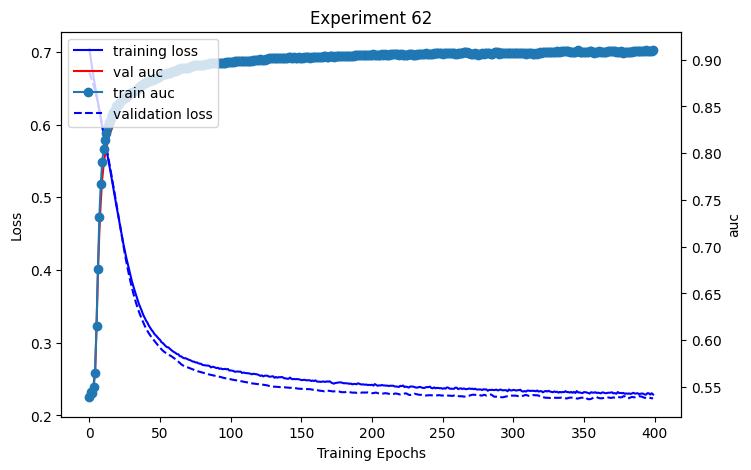

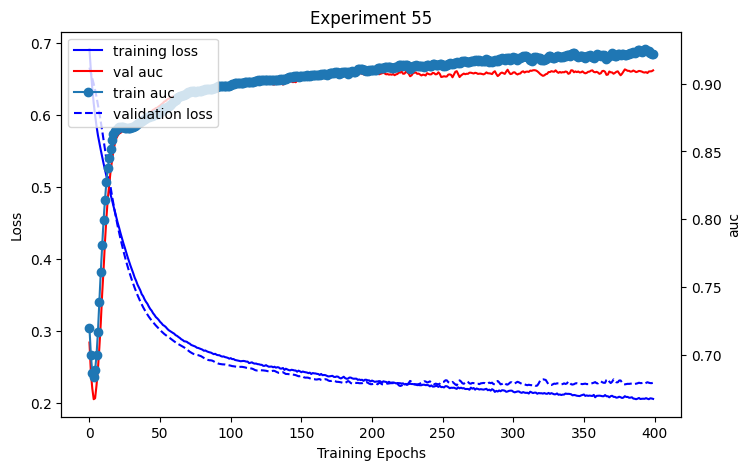

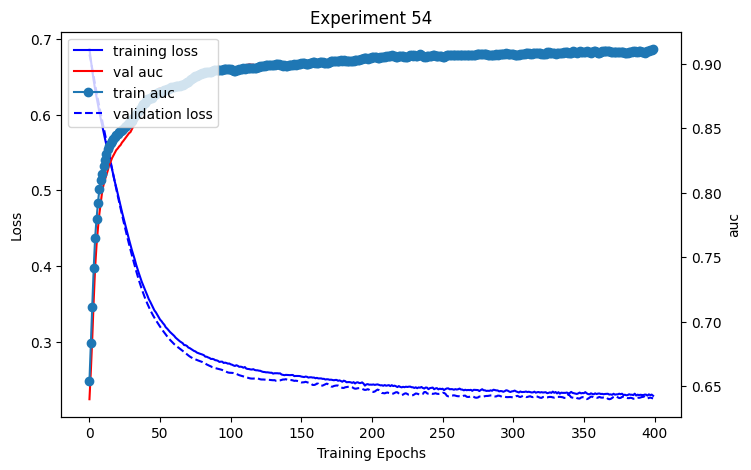

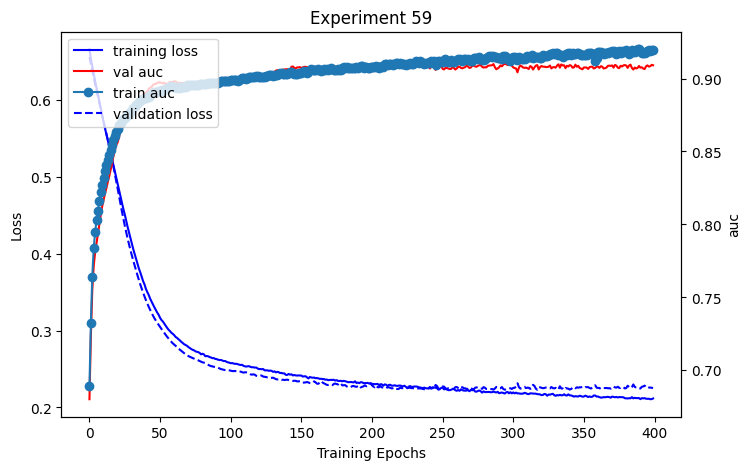

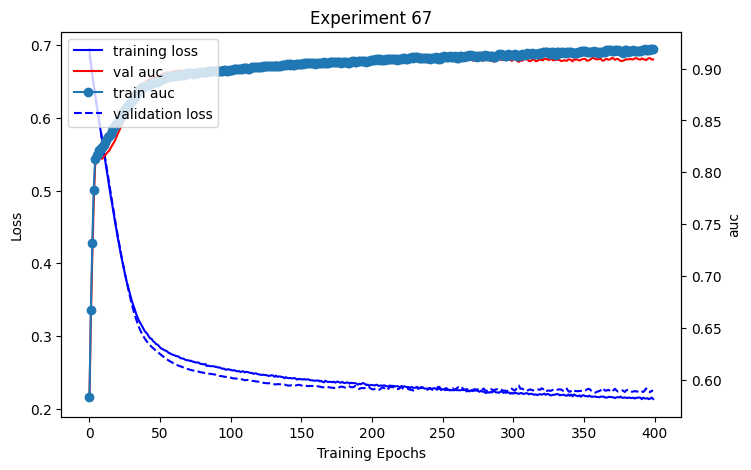

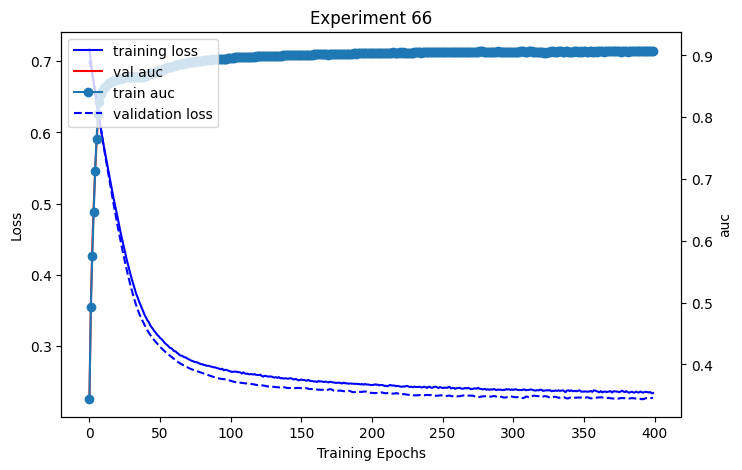

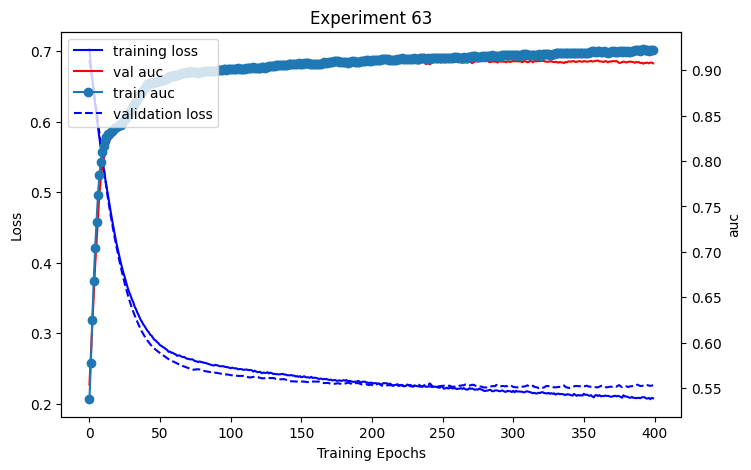

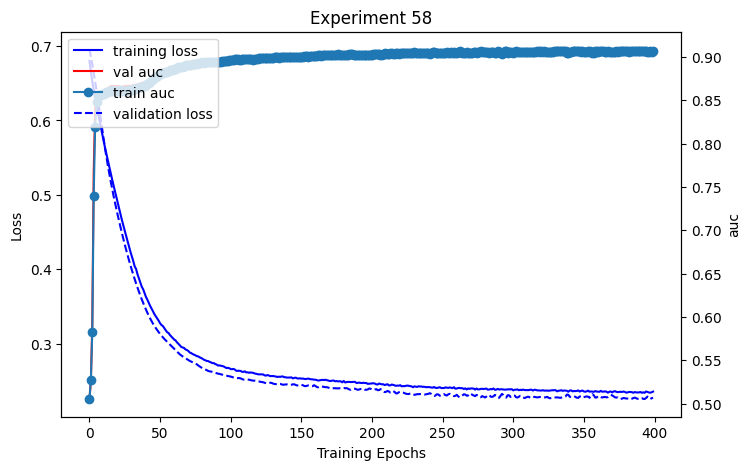

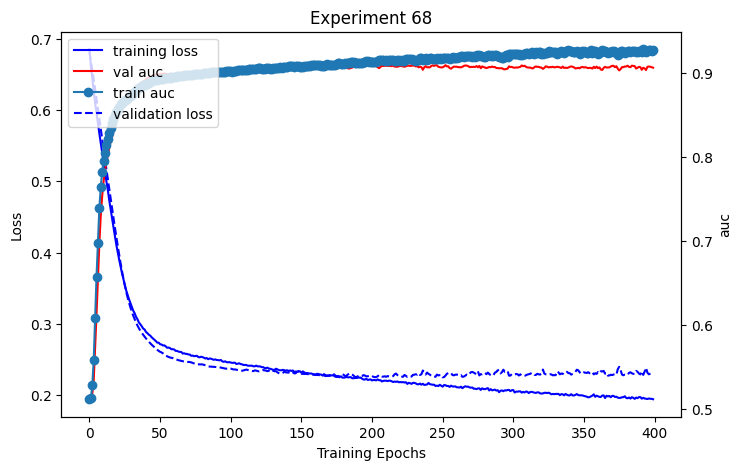

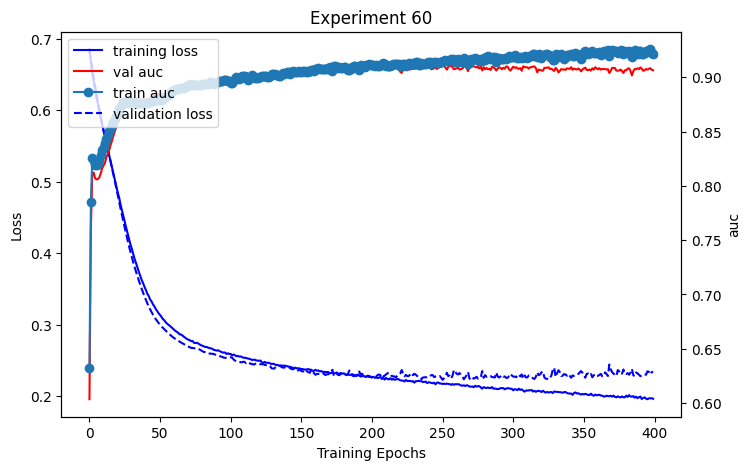

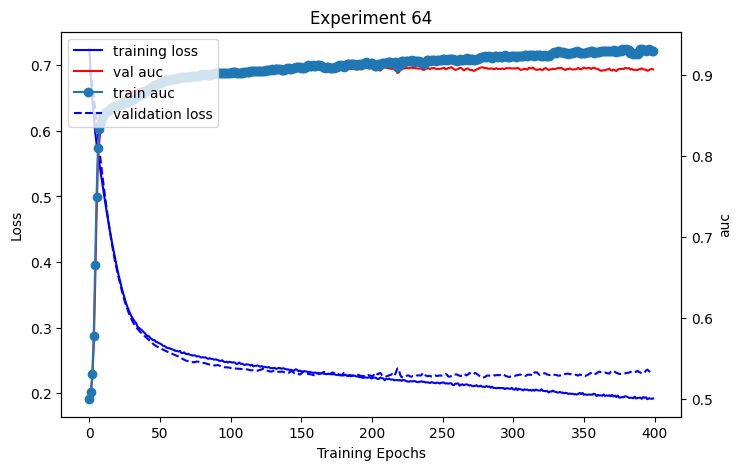

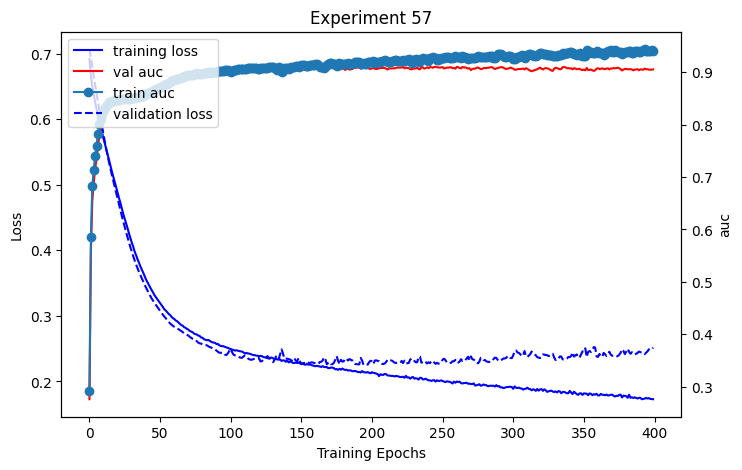

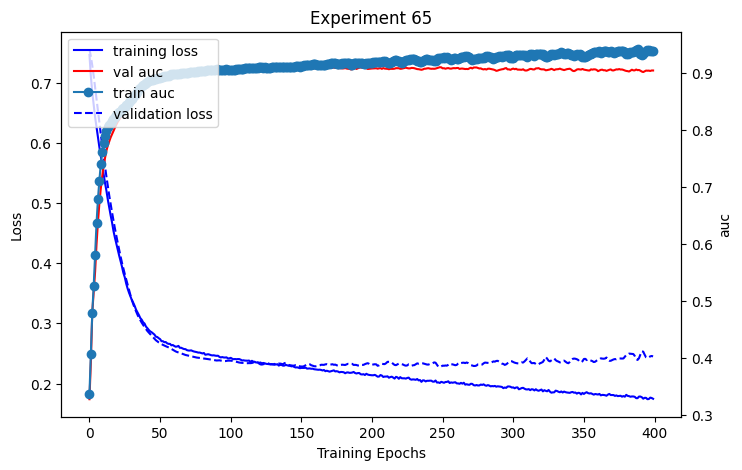

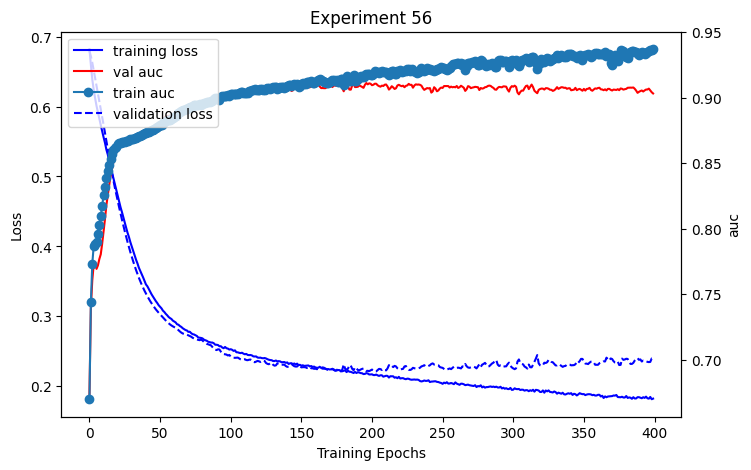

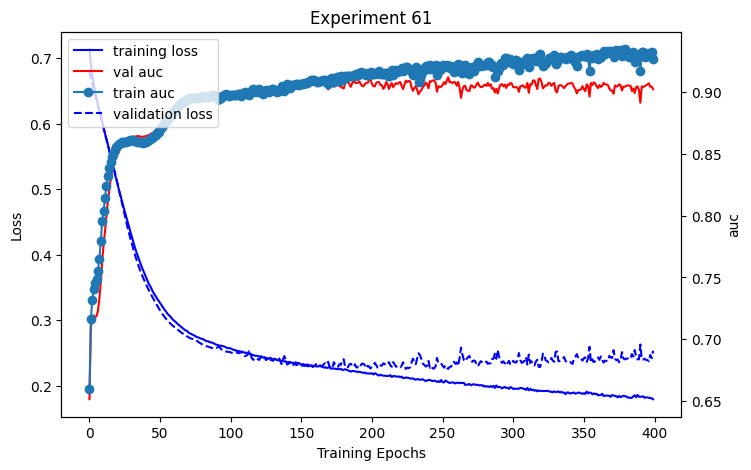

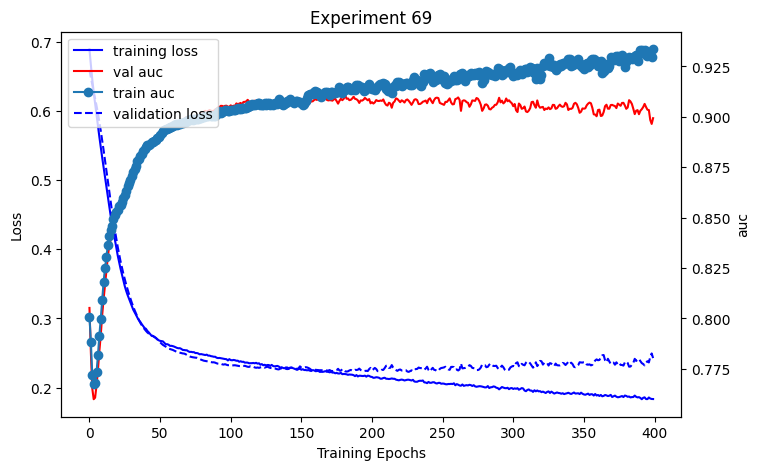

In [63]:
show_results("layers_connectivity")

In [64]:
df.experiment_name.unique()

array(['sage_aggr_type', 'GAT_aggr_type', 'channels_vs_feature',
       'layers_connectivity', 'normalization', 'pre_post_process'],
      dtype=object)

## Conv type and aggregations

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
9      True        True  SAGEConv           10         ones               32   
12     True        True  SAGEConv           10         ones               32   
15     True        True  SAGEConv           10         ones               32   
0      True        True  SAGEConv           10       random               32   
3      True        True  SAGEConv           10       random               32   
6      True        True  SAGEConv           10       random               32   
8      True        True  SAGEConv           10       random               32   
2      True        True  SAGEConv           10       random               32   
5      True        True  SAGEConv           10       random               32   
10     True        True  SAGEConv           10         ones               32   
1      True        True  SAGEConv           10       random               32   
13     True        True  SAGEConv           10         ones               32   
7      True        True  SAGEConv           10       random               32   
4      True        True  SAGEConv           10       random               32   
11     True        True  SAGEConv           10         ones               32   
17     True        True  SAGEConv           10         ones               32   
14     True        True  SAGEConv           10         ones               32   
16     True        True  SAGEConv           10         ones               32   

   layer_connectivity  jumping_knowledge macro_aggregation micro_aggregation  \
9                None              False               sum               sum   
12               None              False              mean               sum   
15               None              False               max               sum   
0                None              False               sum               sum   
3                None              False              mean               sum   
6                None              False               max               sum   
8                None              False               max               max   
2                None              False               sum               max   
5                None              False              mean               max   
10               None              False               sum              mean   
1                None              False               sum              mean   
13               None              False              mean              mean   
7                None              False               max              mean   
4                None              False              mean              mean   
11               None              False               sum               max   
17               None              False               max               max   
14               None              False              mean               max   
16               None              False               max              mean   

    msg_passing_layers  post_process_layers  pre_process_layers    auc  \
9                    2                    1                   0  0.909   
12                   2                    1                   0  0.908   
15                   2                    1                   0  0.906   
0                    2                    1                   0  0.901   
3                    2                    1                   0  0.901   
6                    2                    1                   0  0.894   
8                    2                    1                   0  0.889   
2                    2                    1                   0  0.888   
5                    2                    1                   0  0.883   
10                   2                    1                   0  0.874   
1                    2                    1                   0  0.871   
13                   2                    1                   0  0.869   


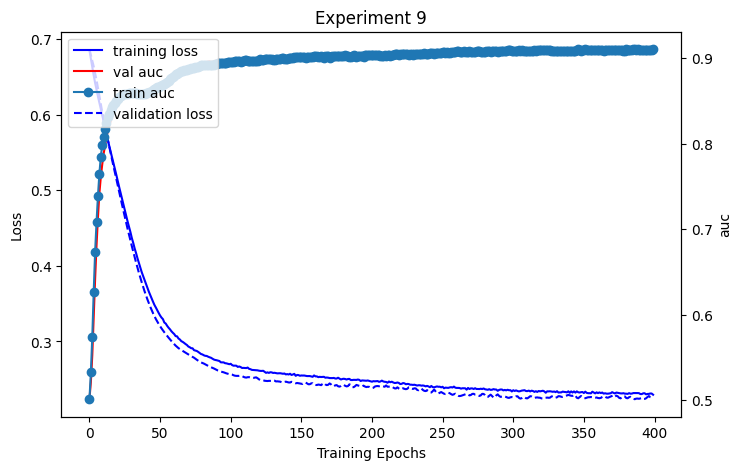

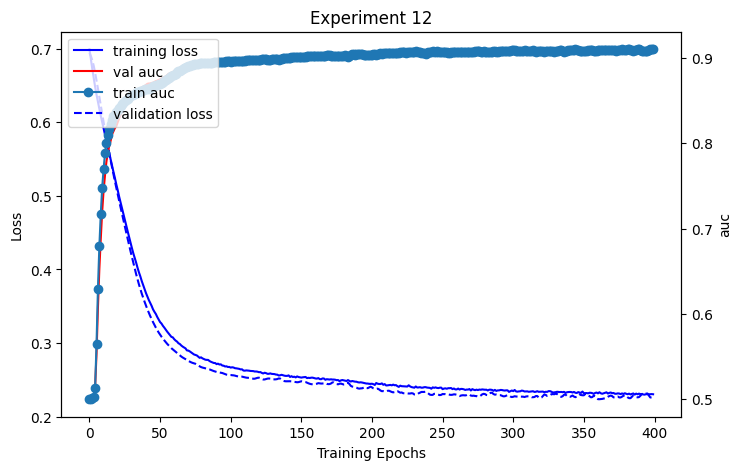

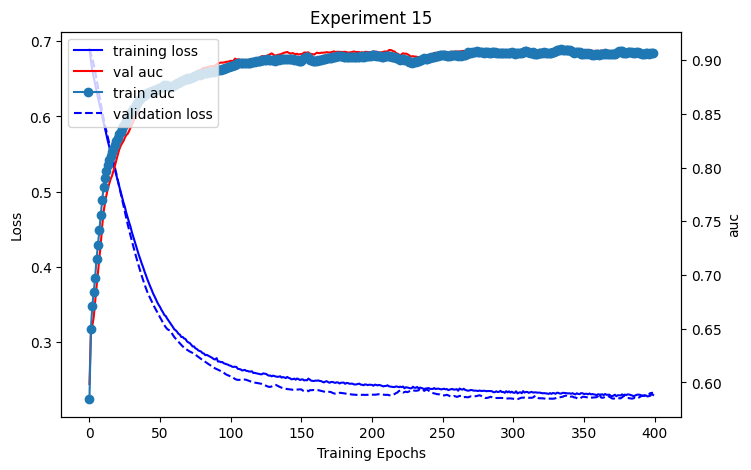

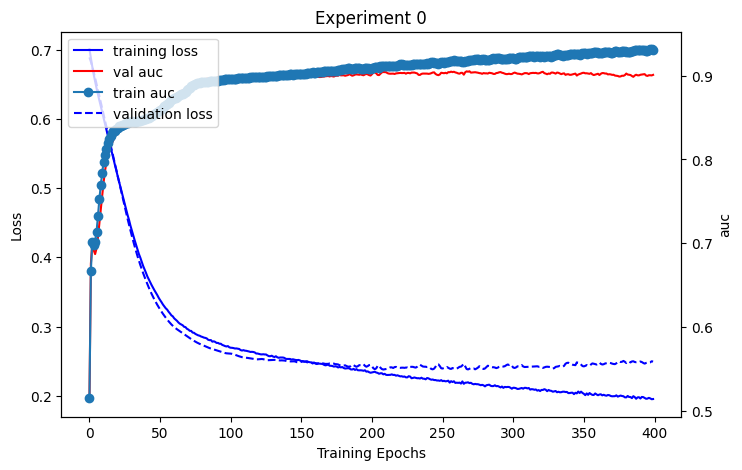

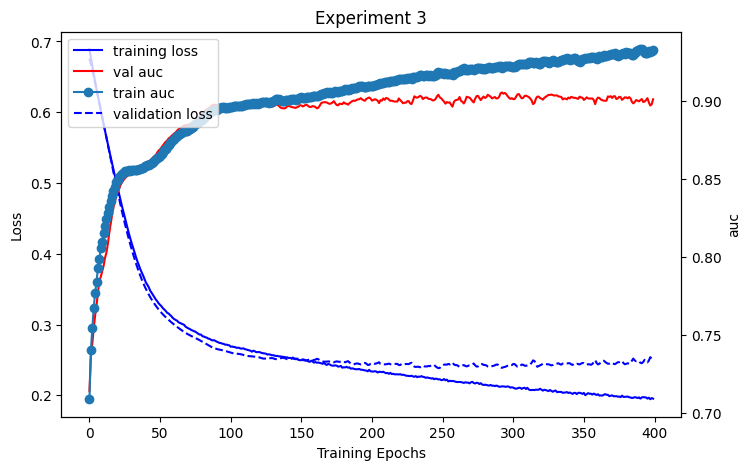

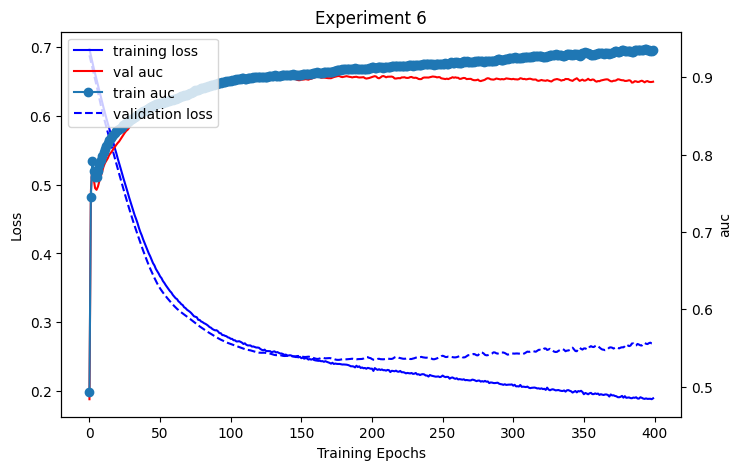

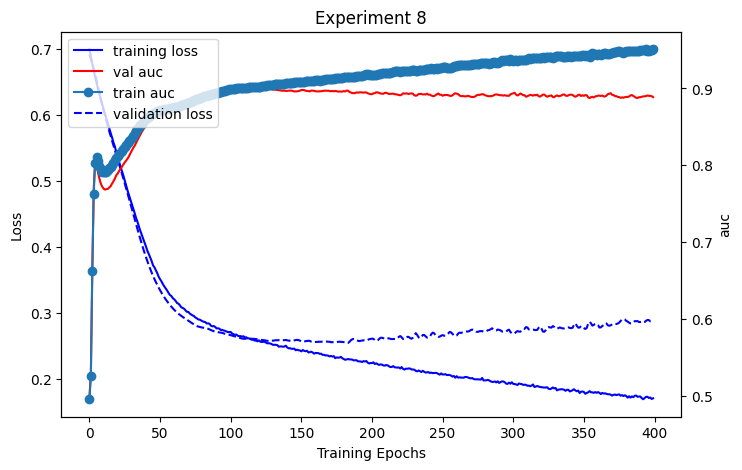

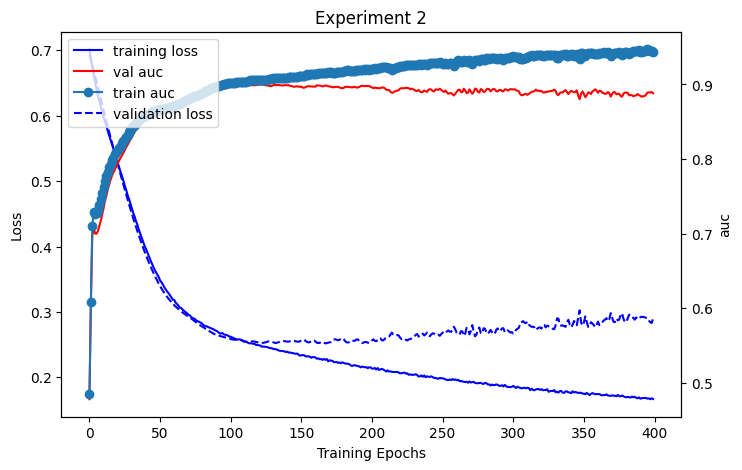

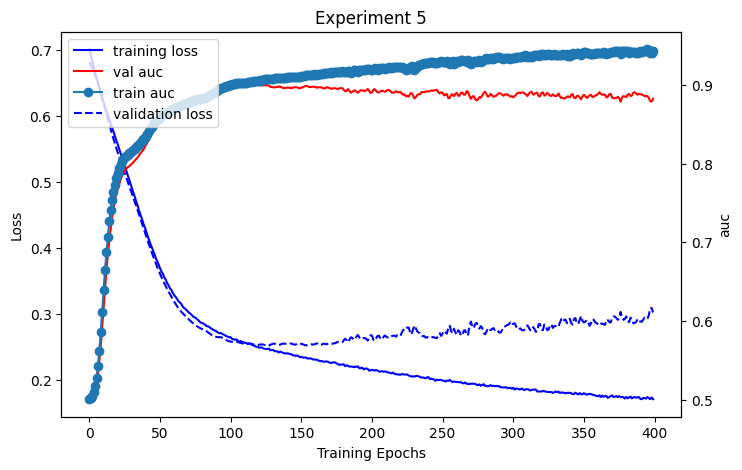

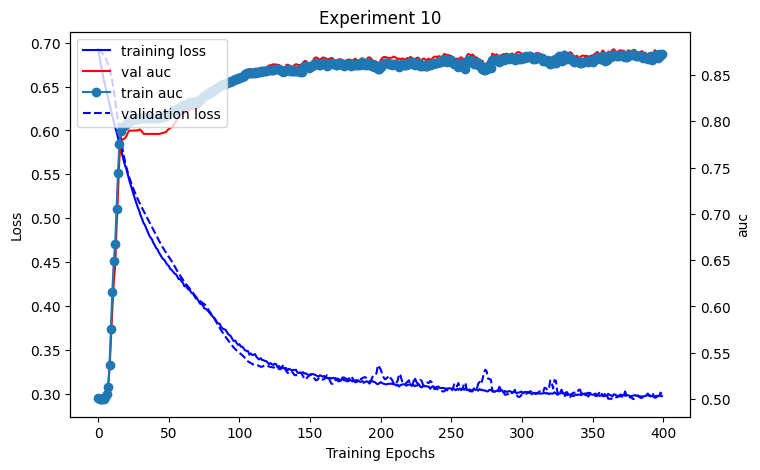

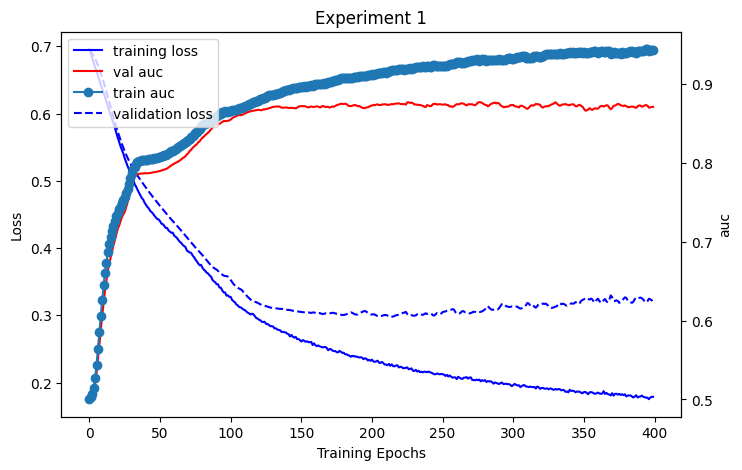

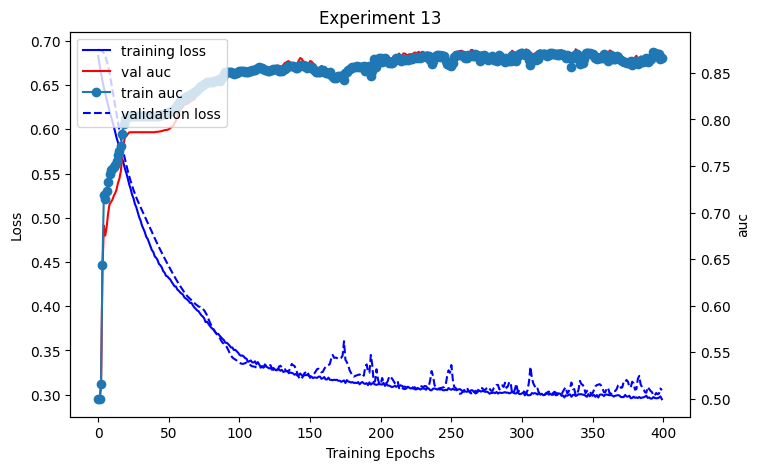

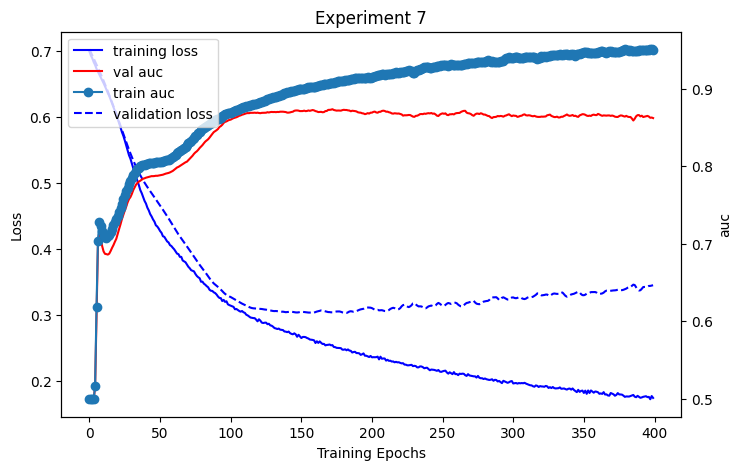

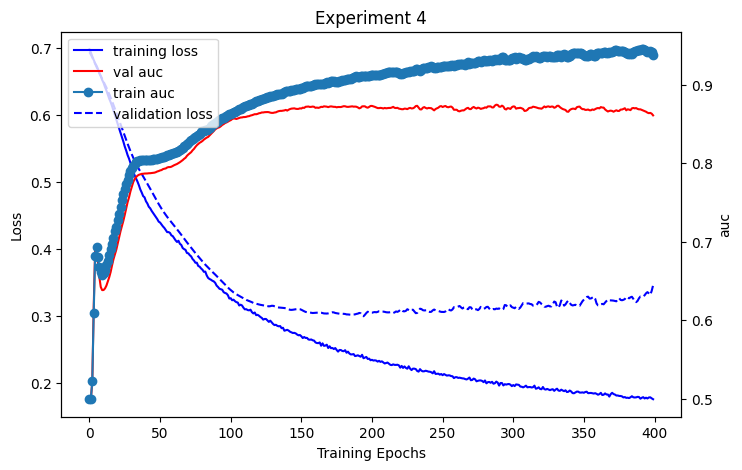

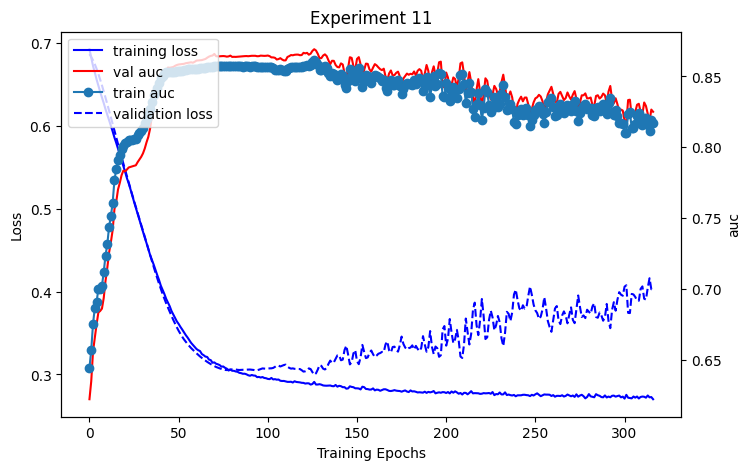

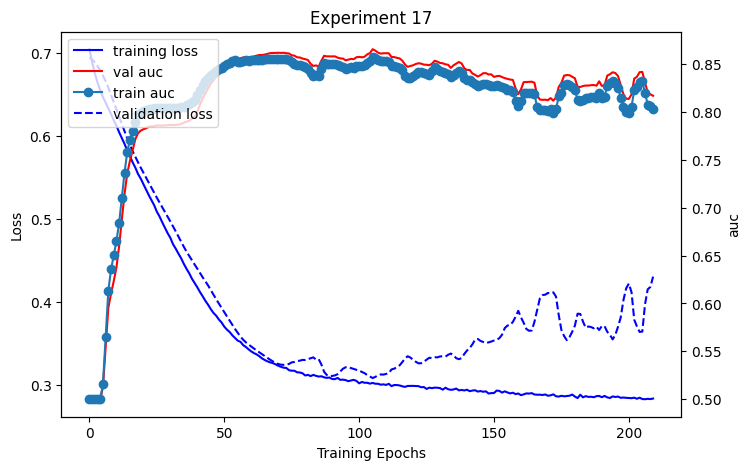

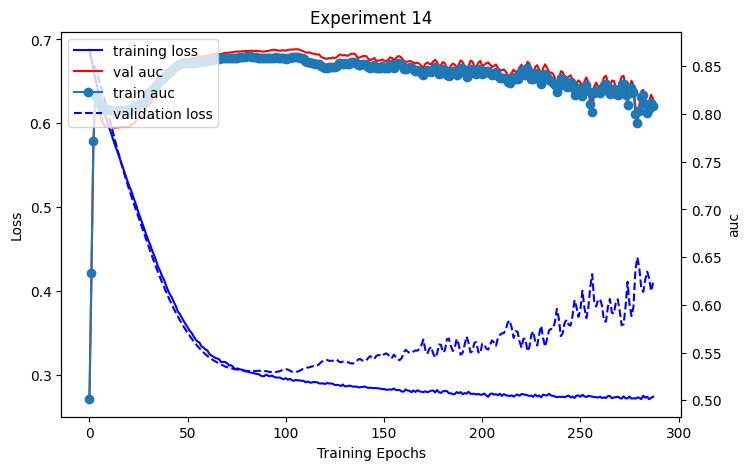

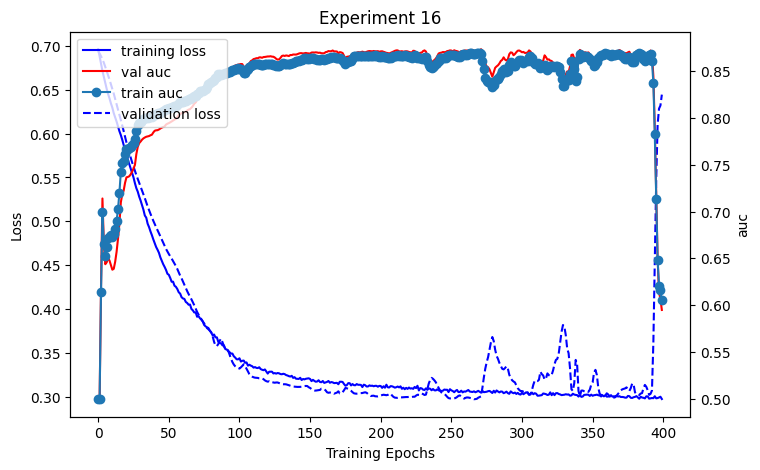

In [65]:
show_results('sage_aggr_type')

## Aggregations

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
33     True        True  SAGEConv           10         ones               32   
27     True        True  SAGEConv           10         ones               32   
30     True        True  SAGEConv           10         ones               32   
18     True        True  SAGEConv           10       random               32   
21     True        True  SAGEConv           10       random               32   
24     True        True  SAGEConv           10       random               32   
23     True        True  SAGEConv           10       random               32   
26     True        True  SAGEConv           10       random               32   
20     True        True  SAGEConv           10       random               32   
31     True        True  SAGEConv           10         ones               32   
22     True        True  SAGEConv           10       random               32   
28     True        True  SAGEConv           10         ones               32   
19     True        True  SAGEConv           10       random               32   
25     True        True  SAGEConv           10       random               32   
34     True        True  SAGEConv           10         ones               32   
29     True        True  SAGEConv           10         ones               32   
32     True        True  SAGEConv           10         ones               32   
35     True        True  SAGEConv           10         ones               32   

   layer_connectivity  jumping_knowledge macro_aggregation micro_aggregation  \
33               None              False               max               sum   
27               None              False               sum               sum   
30               None              False              mean               sum   
18               None              False               sum               sum   
21               None              False              mean               sum   
24               None              False               max               sum   
23               None              False              mean               max   
26               None              False               max               max   
20               None              False               sum               max   
31               None              False              mean              mean   
22               None              False              mean              mean   
28               None              False               sum              mean   
19               None              False               sum              mean   
25               None              False               max              mean   
34               None              False               max              mean   
29               None              False               sum               max   
32               None              False              mean               max   
35               None              False               max               max   

    msg_passing_layers  post_process_layers  pre_process_layers    auc  \
33                   2                    1                   0  0.908   
27                   2                    1                   0  0.908   
30                   2                    1                   0  0.907   
18                   2                    1                   0  0.902   
21                   2                    1                   0  0.901   
24                   2                    1                   0  0.895   
23                   2                    1                   0  0.892   
26                   2                    1                   0  0.890   
20                   2                    1                   0  0.884   
31                   2                    1                   0  0.877   
22                   2                    1                   0  0.873   
28                   2                    1                   0  0.872   


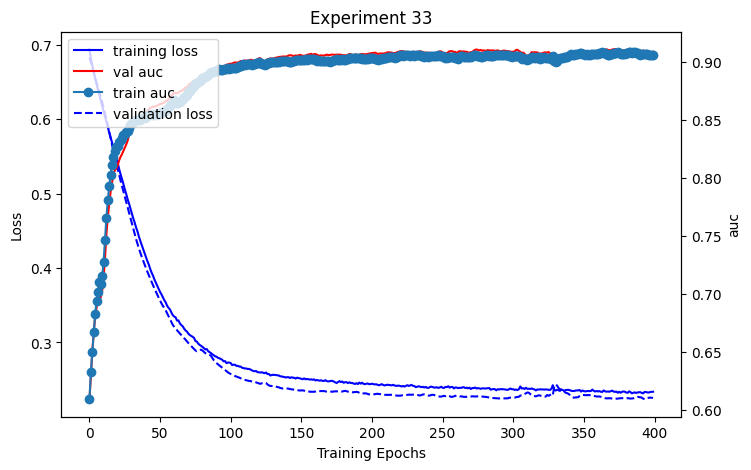

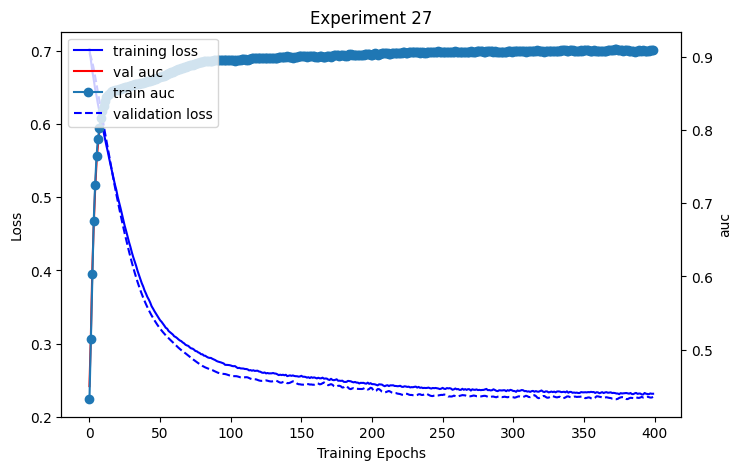

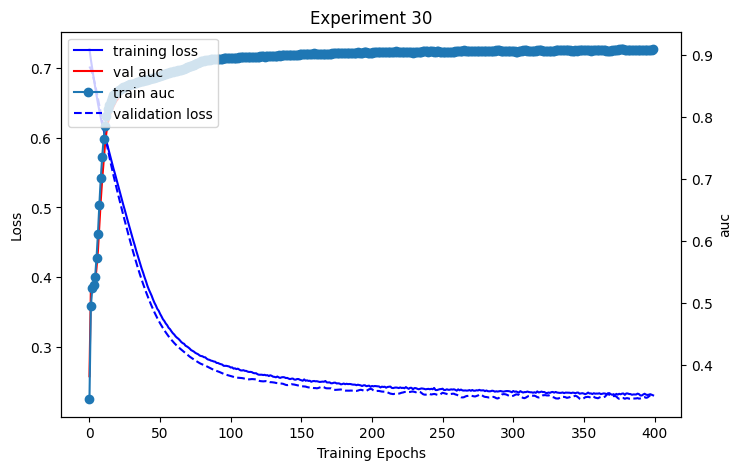

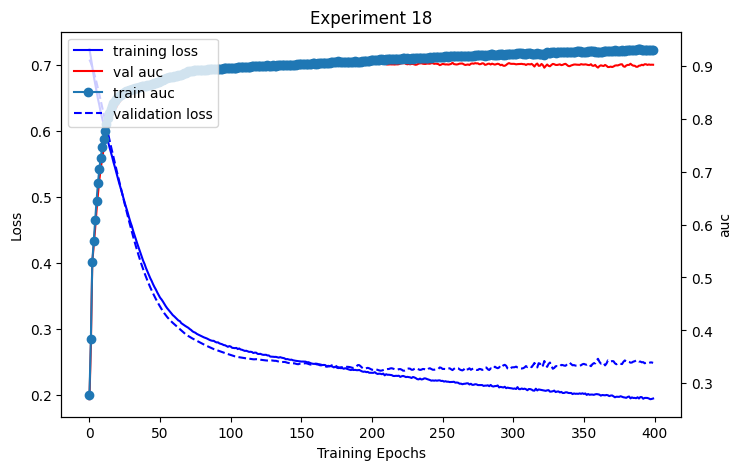

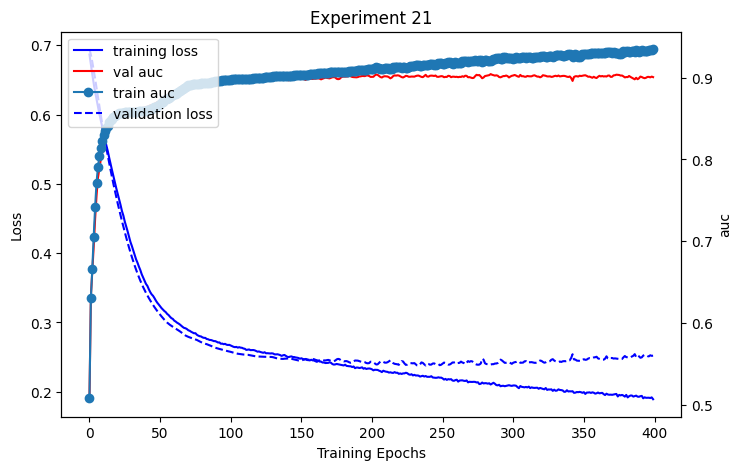

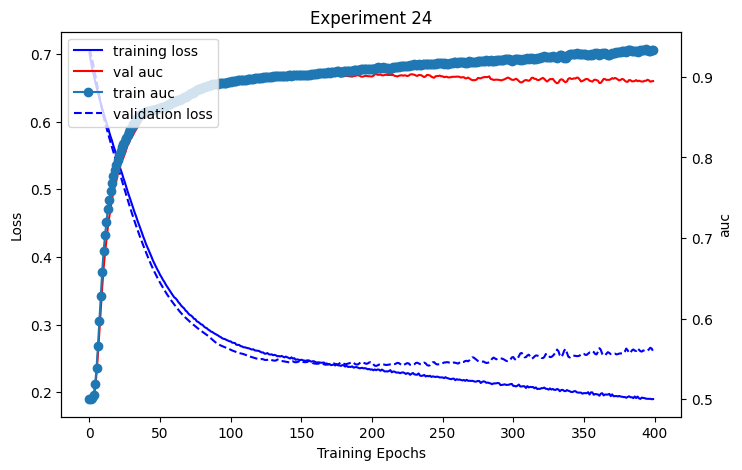

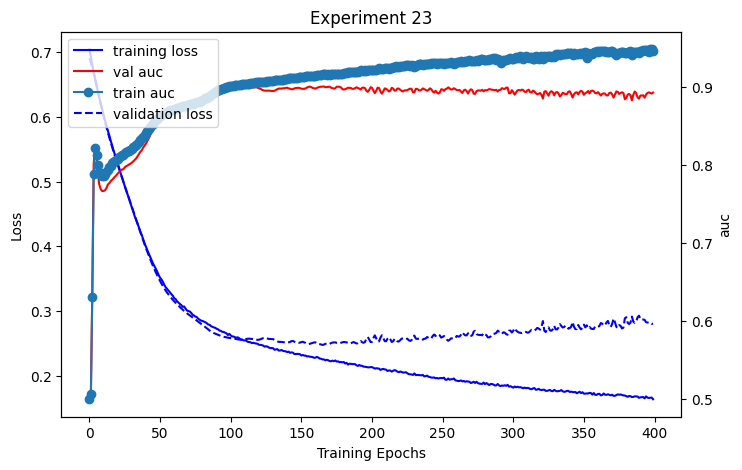

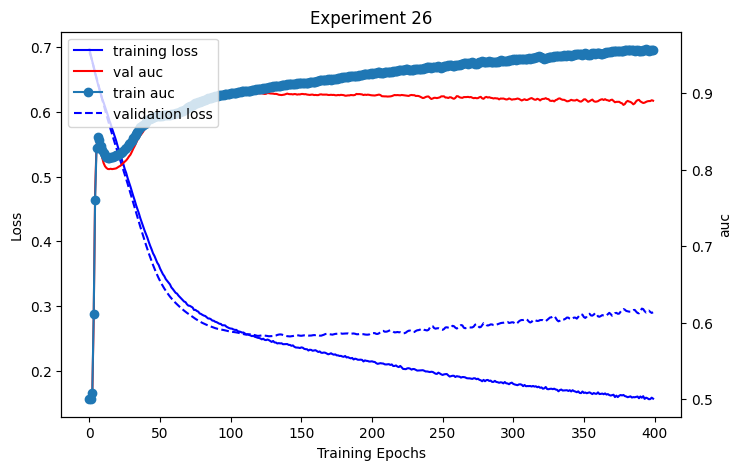

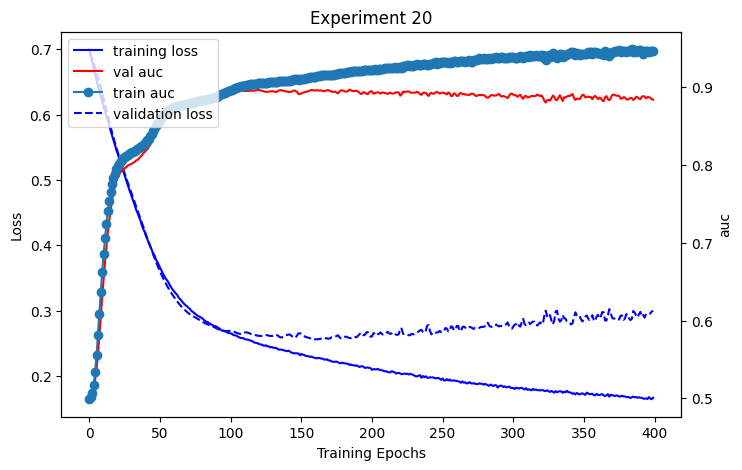

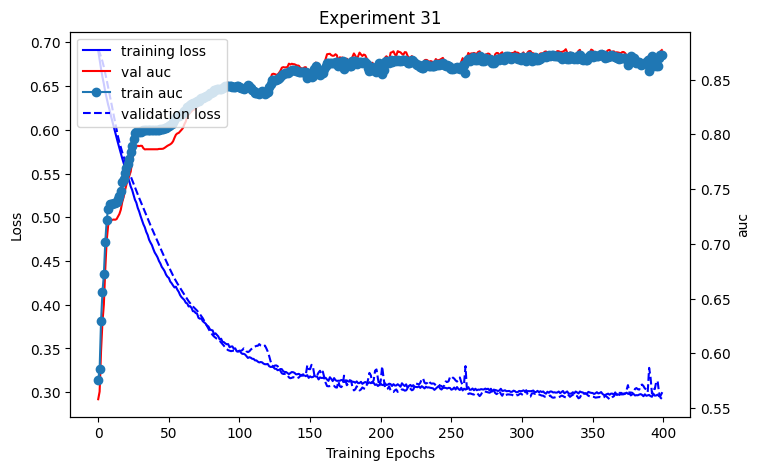

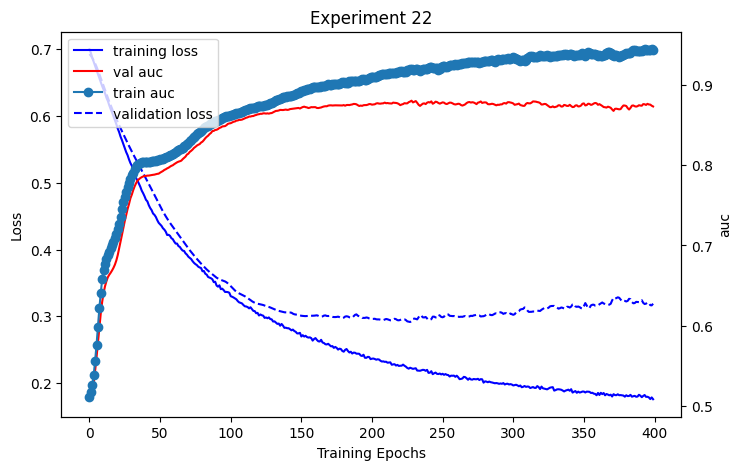

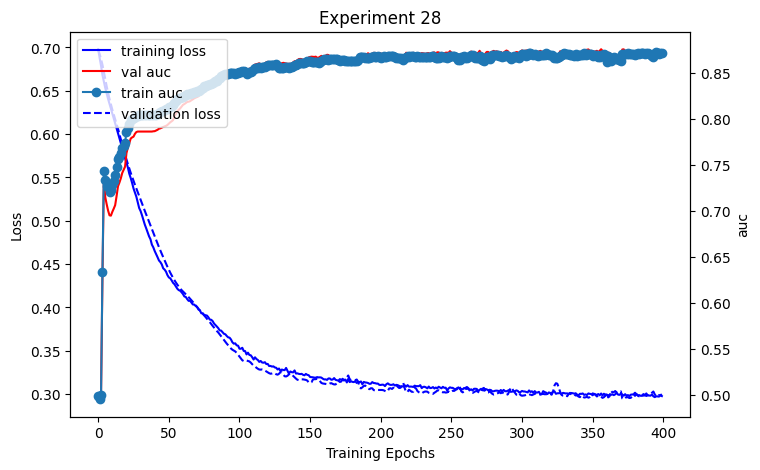

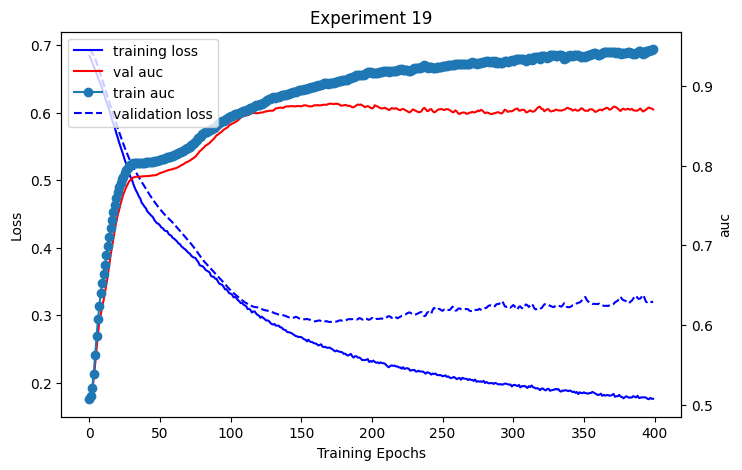

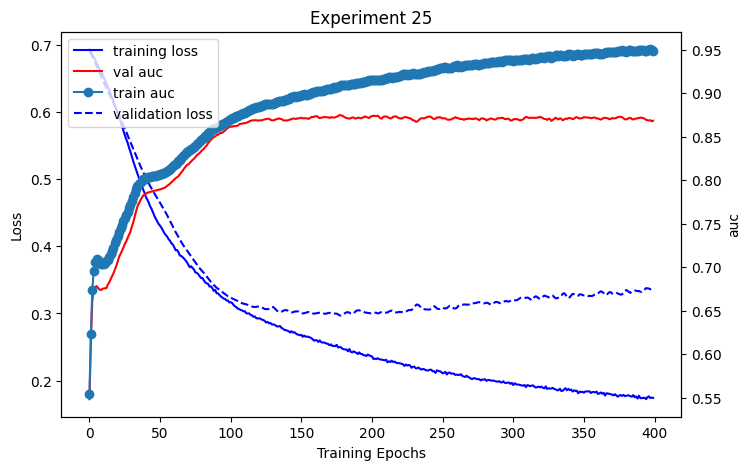

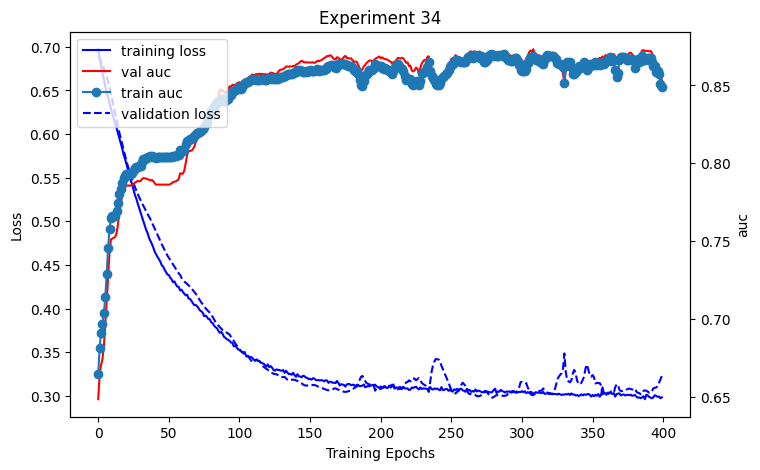

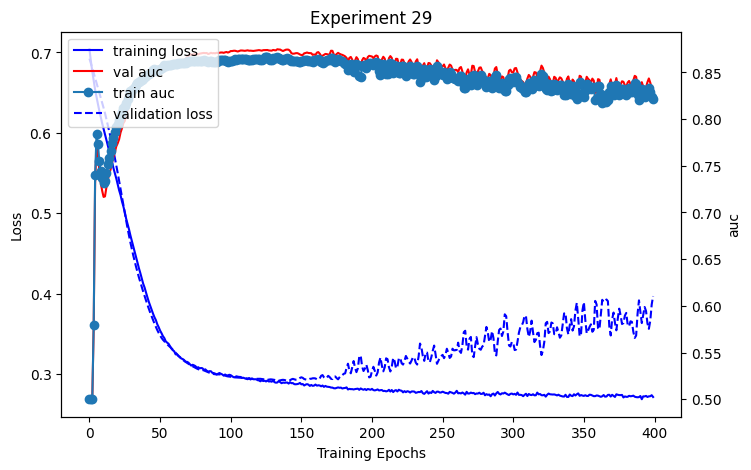

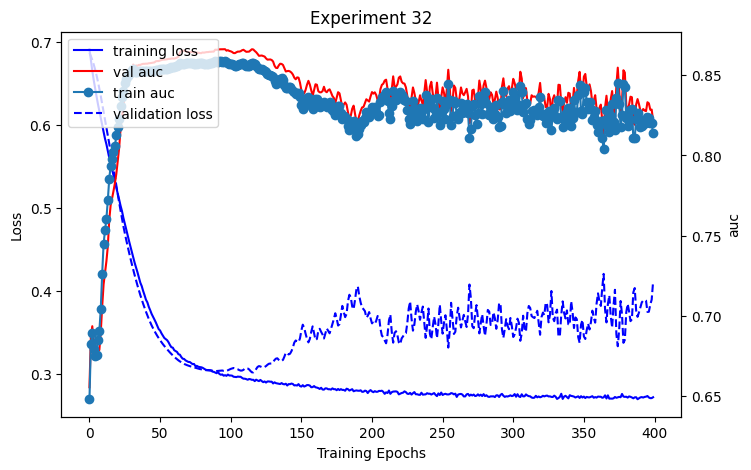

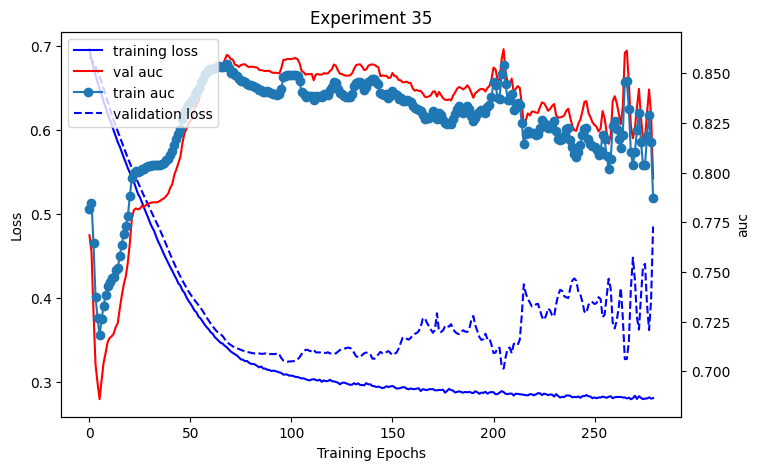

In [66]:
show_results('GAT_aggr_type')

## Connectivity

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
93      True        True  SAGEConv           10         ones               32   
90      True        True  SAGEConv           10         ones               32   
111     True        True  SAGEConv           10       random               32   
113     True        True  SAGEConv           10       random               32   
81      True        True  SAGEConv           10         ones               32   
108     True        True  SAGEConv           10       random               32   
84      True        True  SAGEConv           10         ones               32   
112     True        True  SAGEConv           10       random               32   
87      True        True  SAGEConv           10         ones               32   
78      True        True  SAGEConv           10         ones               32   
105     True        True  SAGEConv           10       random               32   
99      True        True  SAGEConv           10       random               32   
110     True        True  SAGEConv           10       random               32   
102     True        True  SAGEConv           10       random               32   
96      True        True  SAGEConv           10       random               32   
98      True        True  SAGEConv           10       random               32   
100     True        True  SAGEConv           10       random               32   
109     True        True  SAGEConv           10       random               32   
89      True        True  SAGEConv           10         ones               32   
97      True        True  SAGEConv           10       random               32   
106     True        True  SAGEConv           10       random               32   
107     True        True  SAGEConv           10       random               32   
101     True        True  SAGEConv           10       random               32   
104     True        True  SAGEConv           10       random               32   
103     True        True  SAGEConv           10       random               32   
83      True        True  SAGEConv           10         ones               32   
80      True        True  SAGEConv           10         ones               32   
79      True        True  SAGEConv           10         ones               32   
92      True        True  SAGEConv           10         ones               32   
85      True        True  SAGEConv           10         ones               32   
91      True        True  SAGEConv           10         ones               32   
86      True        True  SAGEConv           10         ones               32   
88      True        True  SAGEConv           10         ones               32   
95      True        True  SAGEConv           10         ones               32   
82      True        True  SAGEConv           10         ones               32   
94      True        True  SAGEConv           10         ones               32   

    layer_connectivity  jumping_knowledge macro_aggregation micro_aggregation  \
93                None              False               sum               sum   
90                None              False               sum               sum   
111               None              False               sum               sum   
113               None              False               sum               sum   
81                None              False               sum               sum   
108               None              False               sum               sum   
84                None              False               sum               sum   
112               None              False               sum               sum   
87                None              False               sum               sum   
78                None              False               sum               sum   
105               None              False               sum               sum   
99                None             

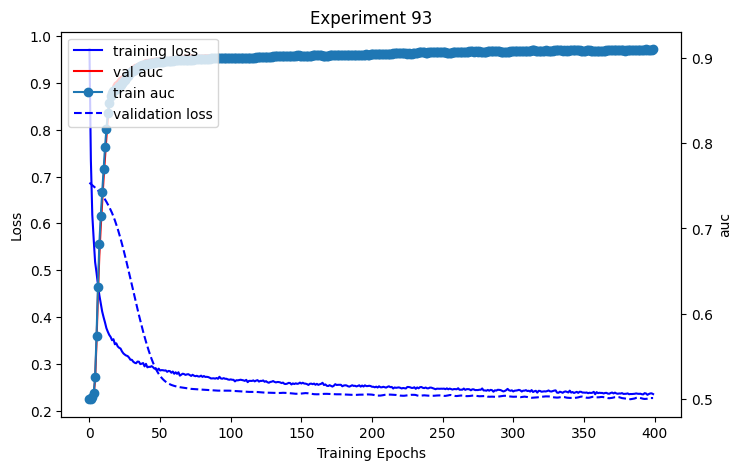

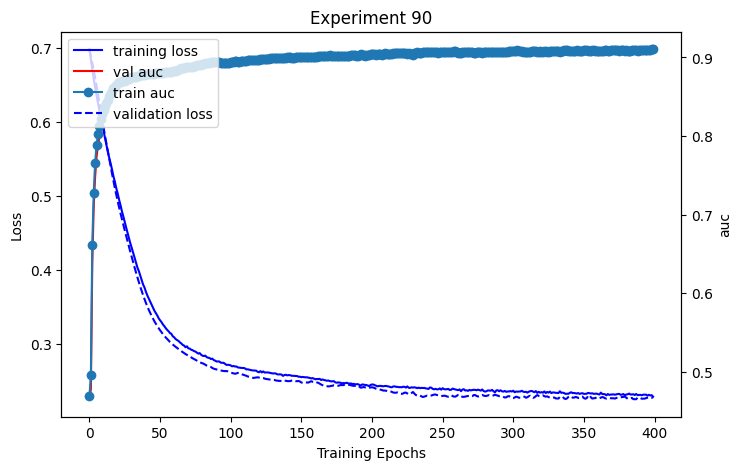

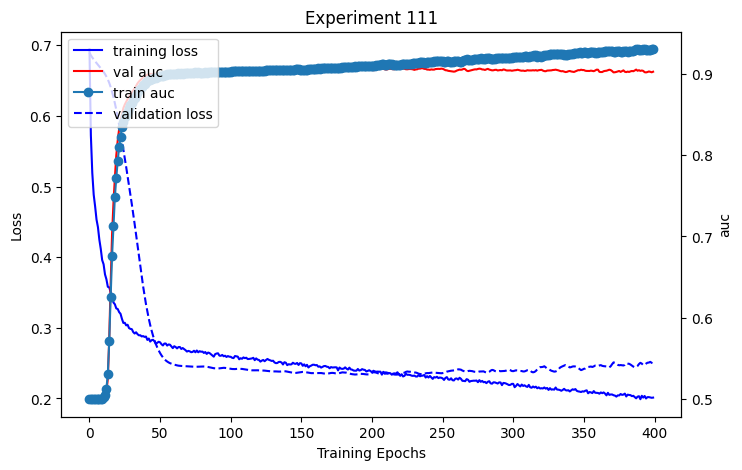

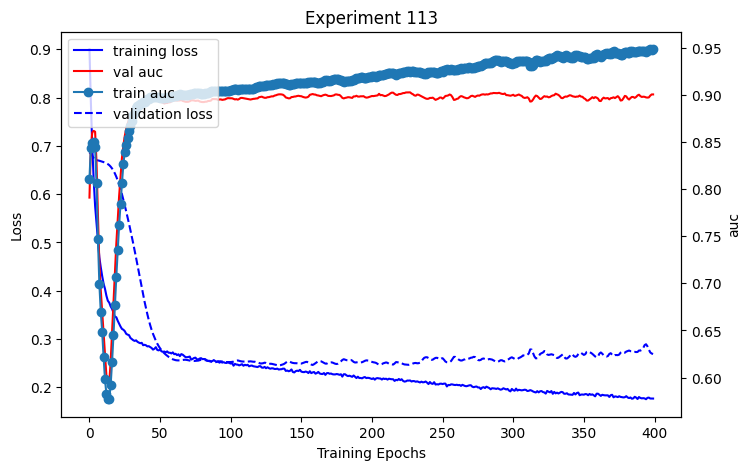

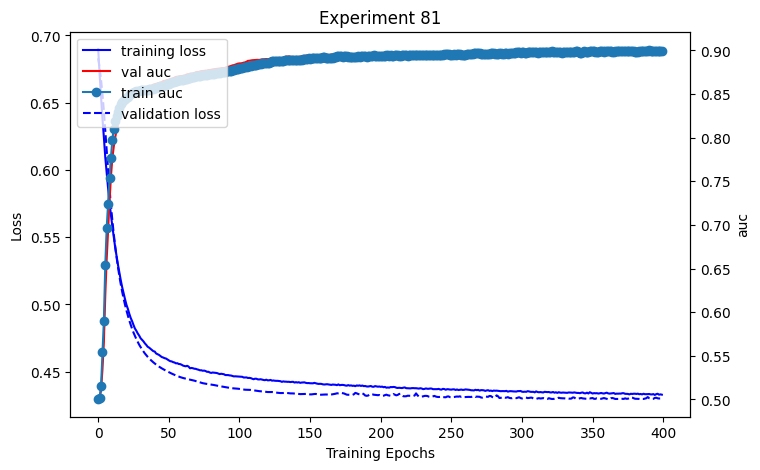

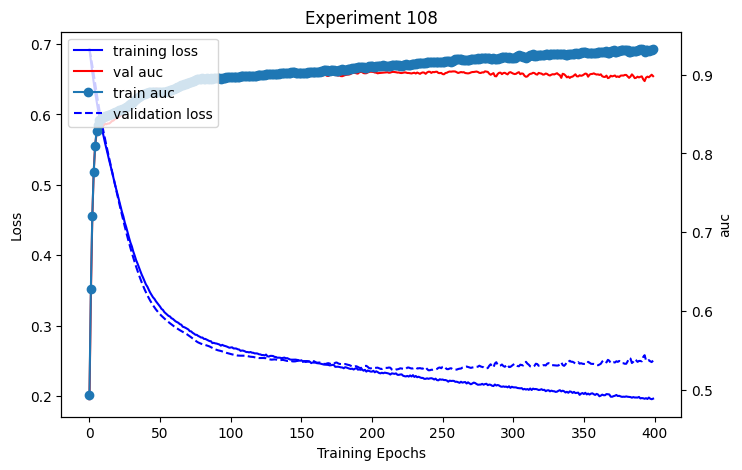

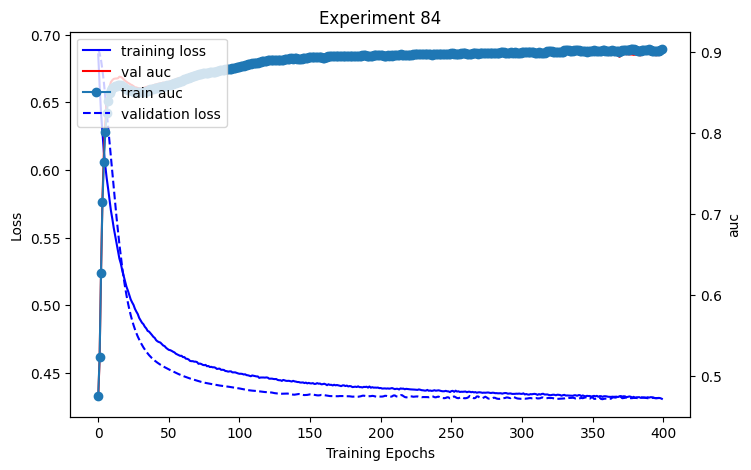

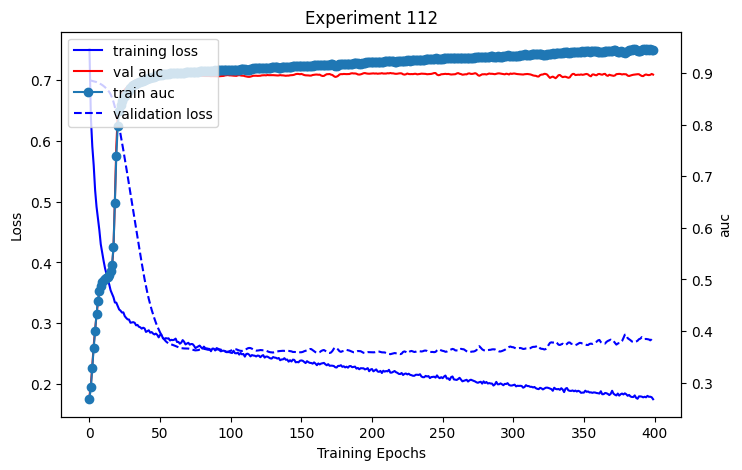

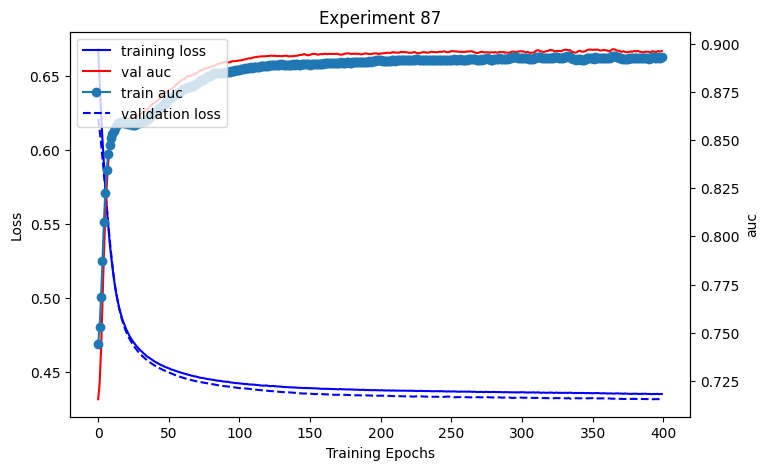

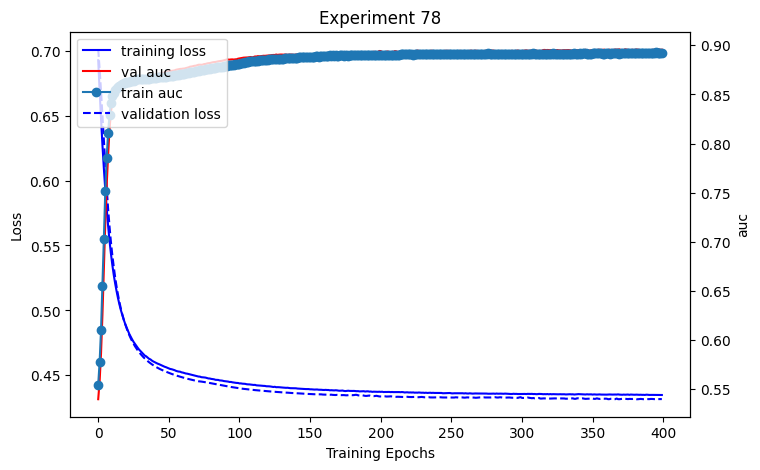

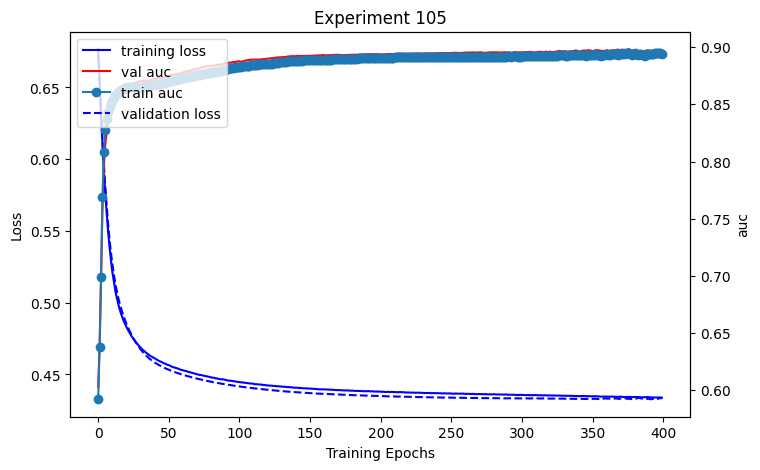

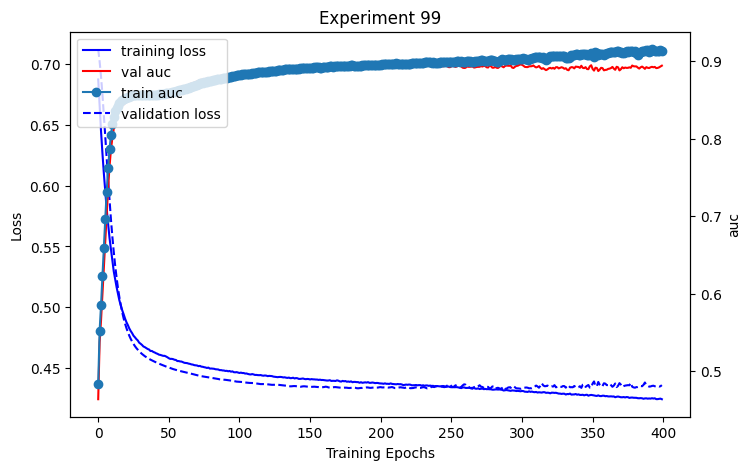

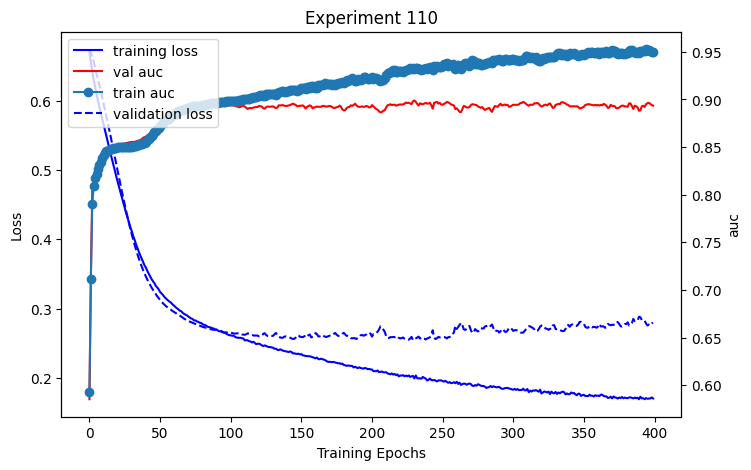

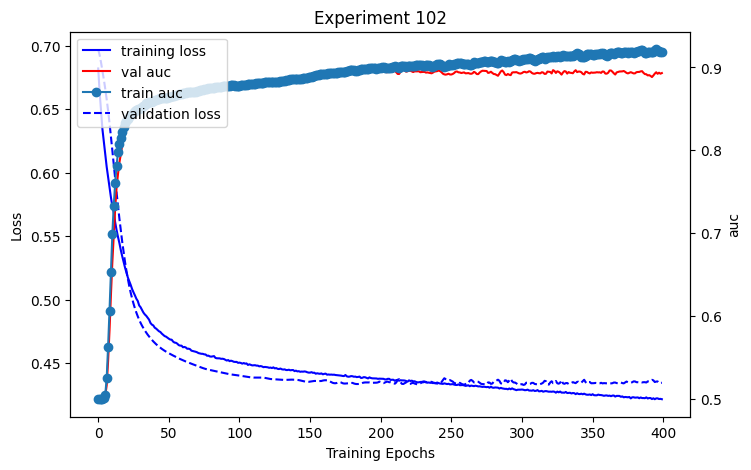

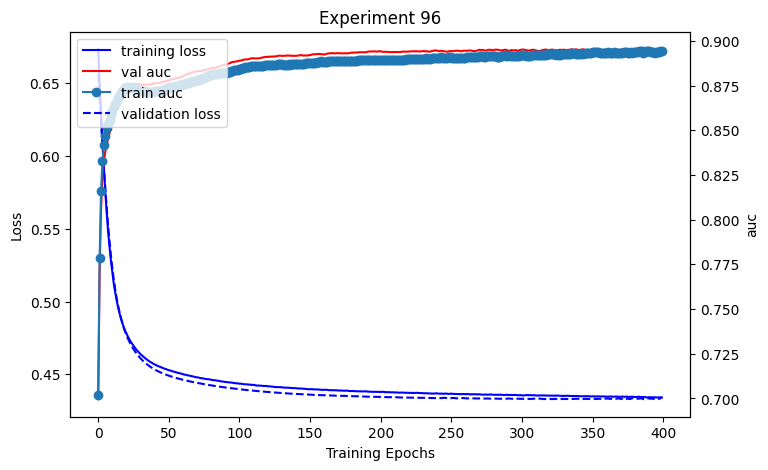

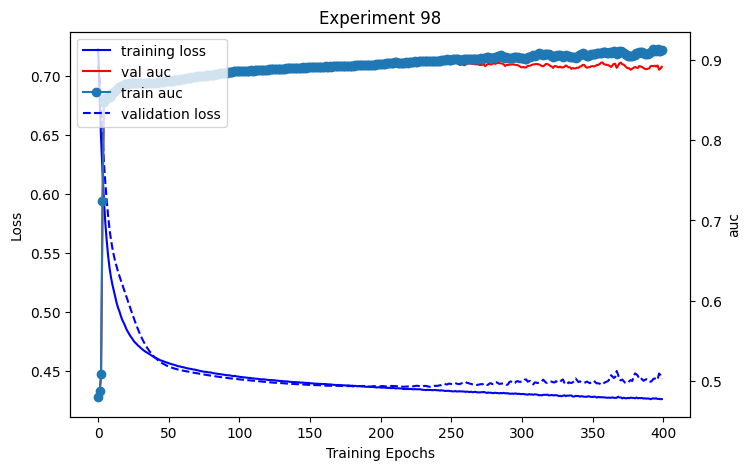

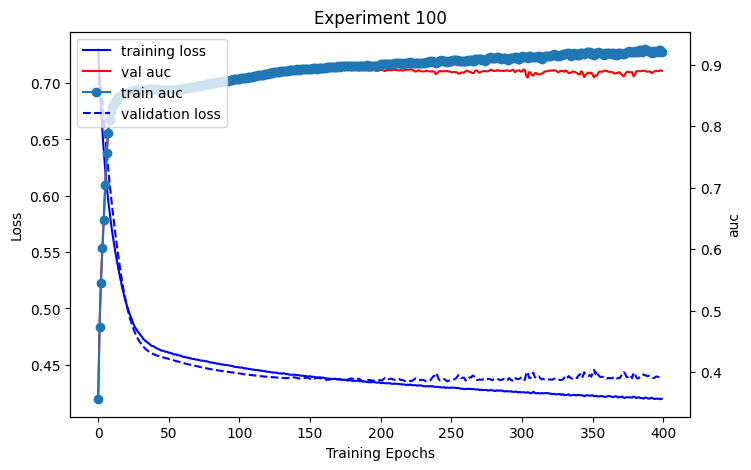

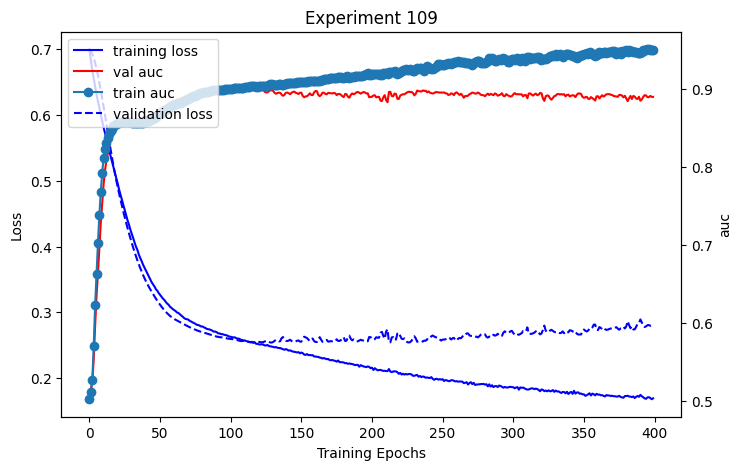

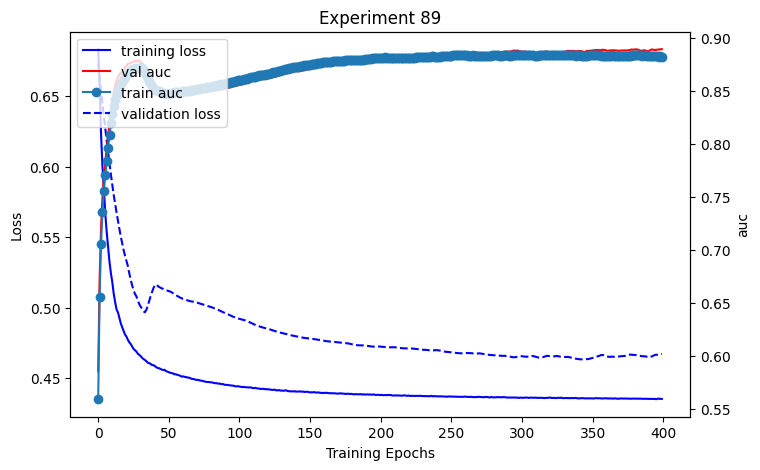

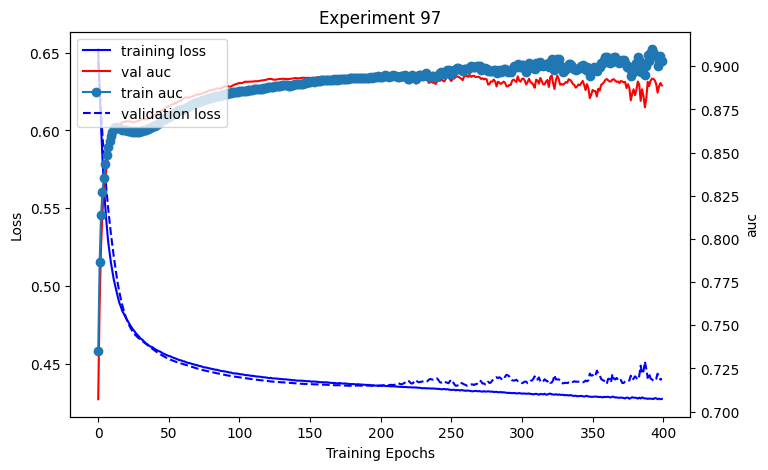

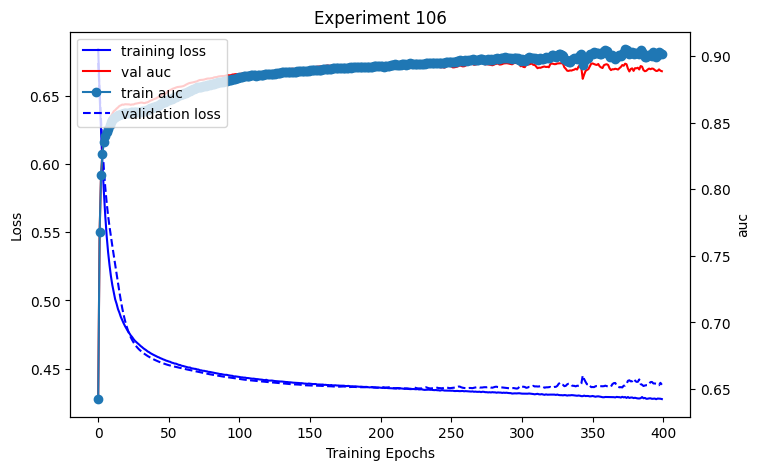

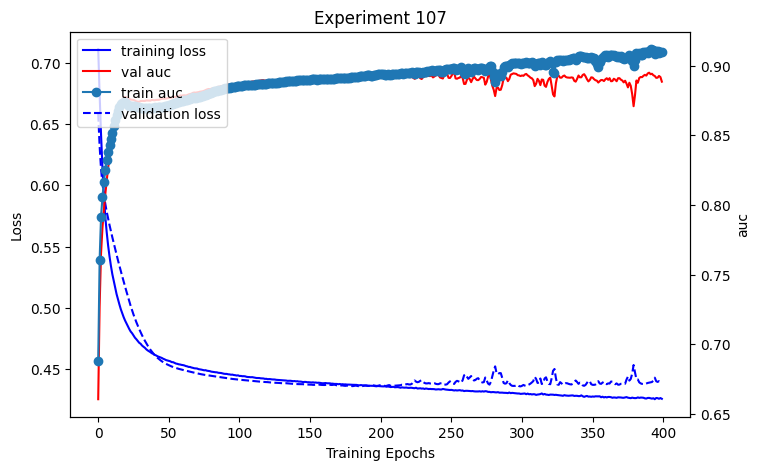

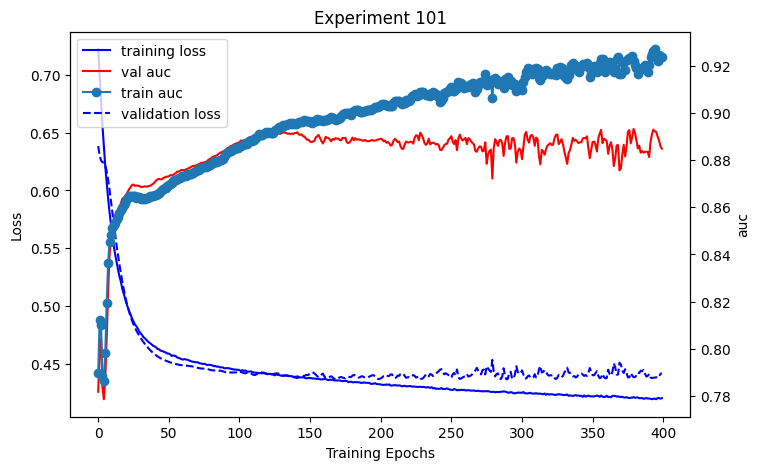

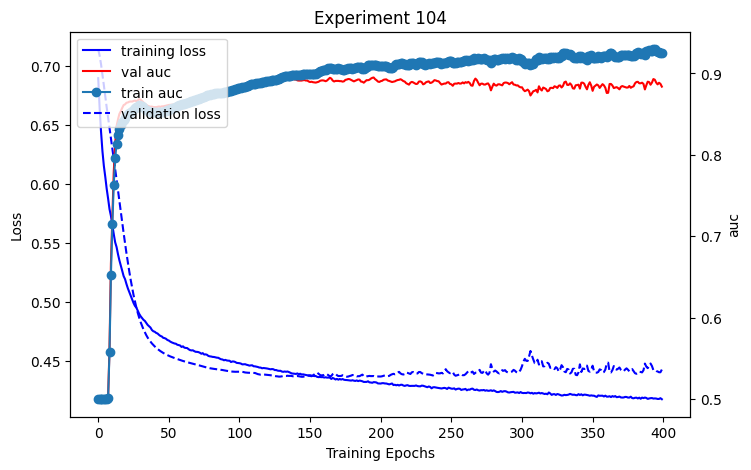

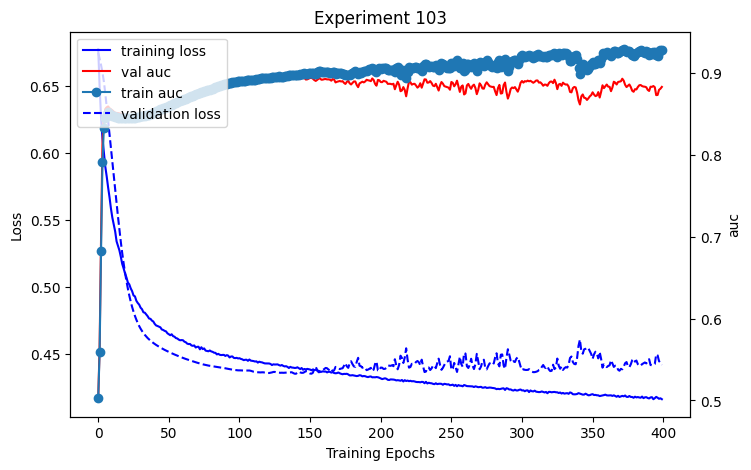

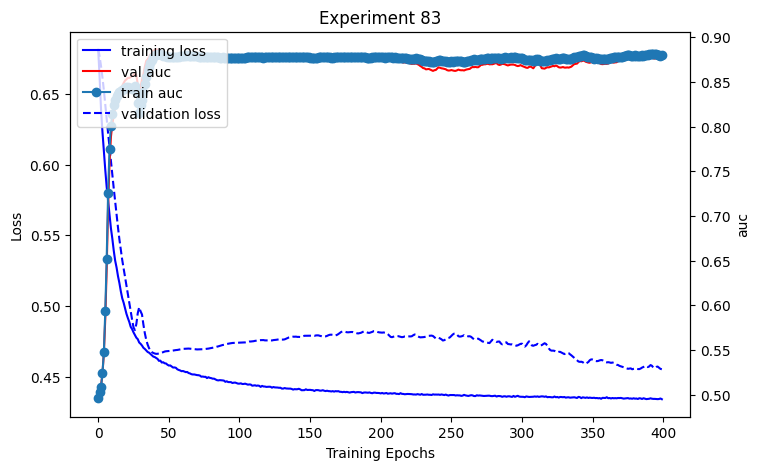

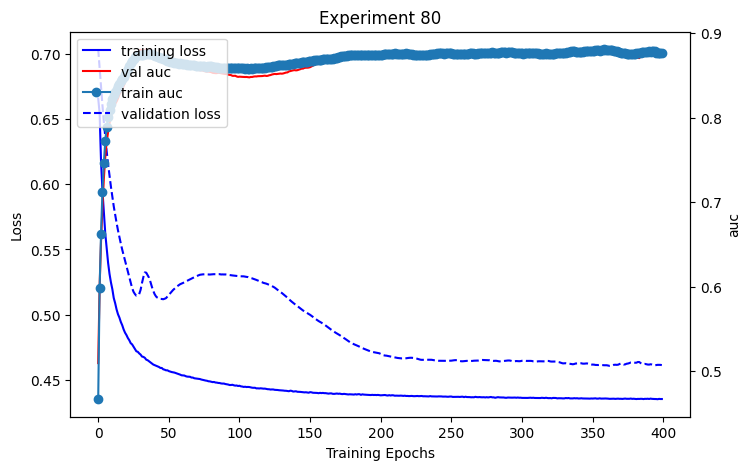

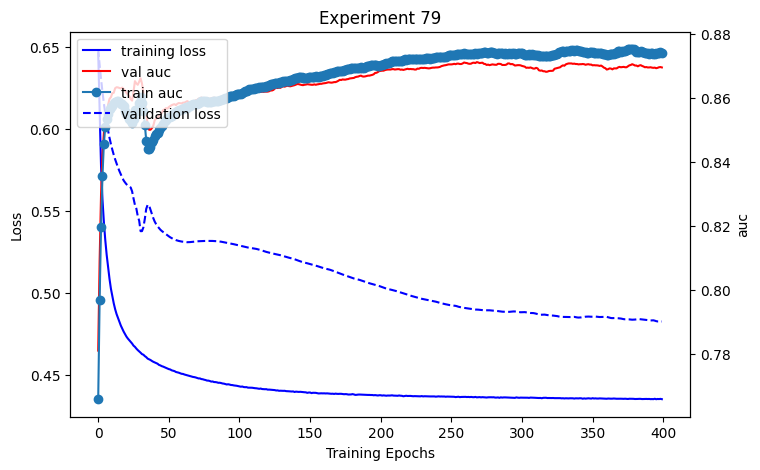

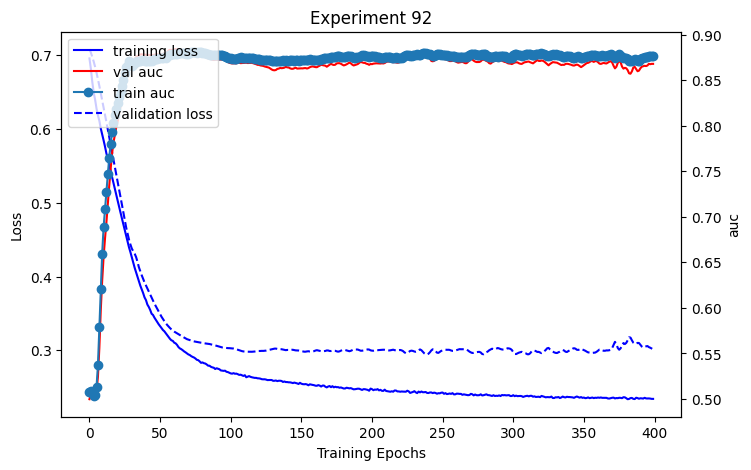

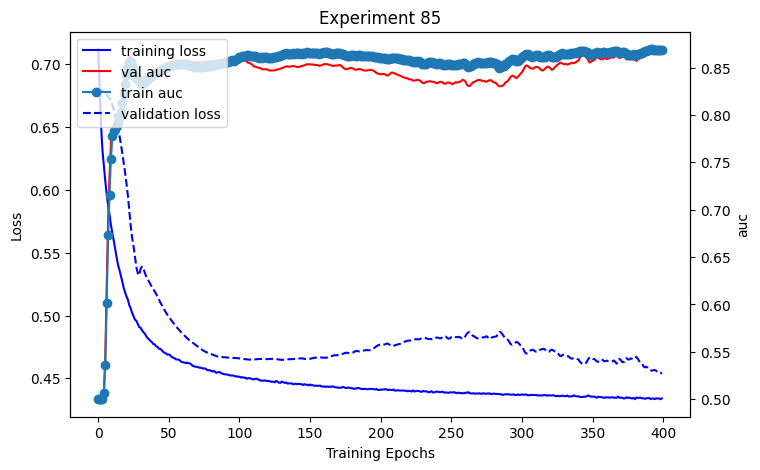

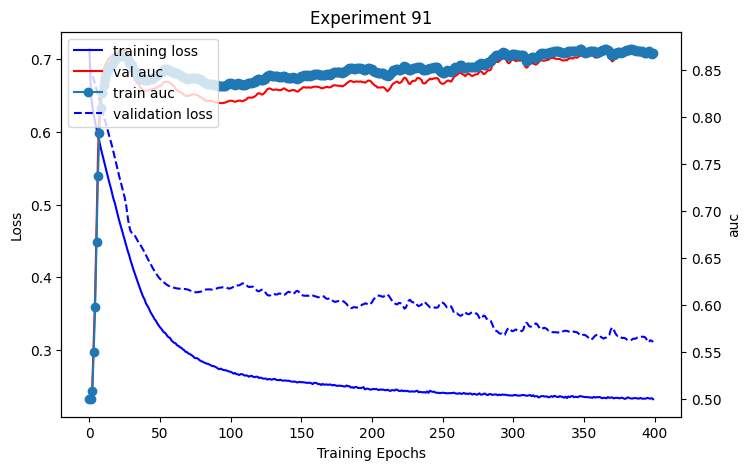

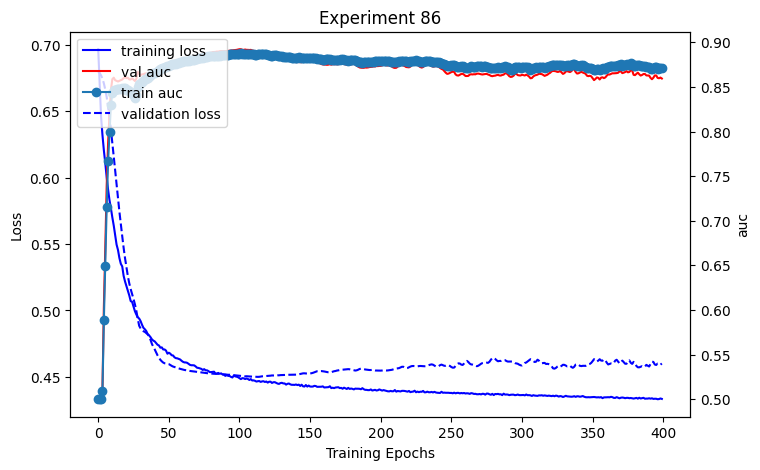

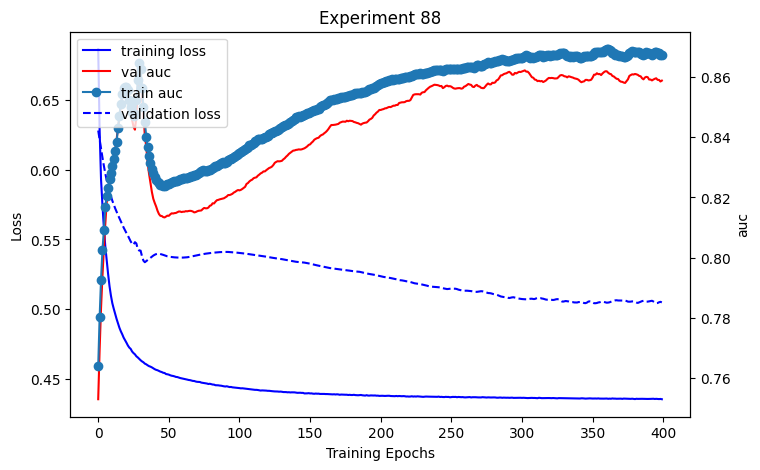

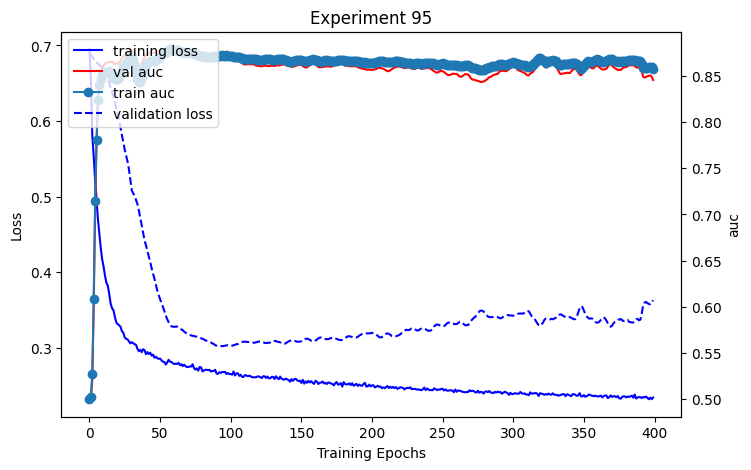

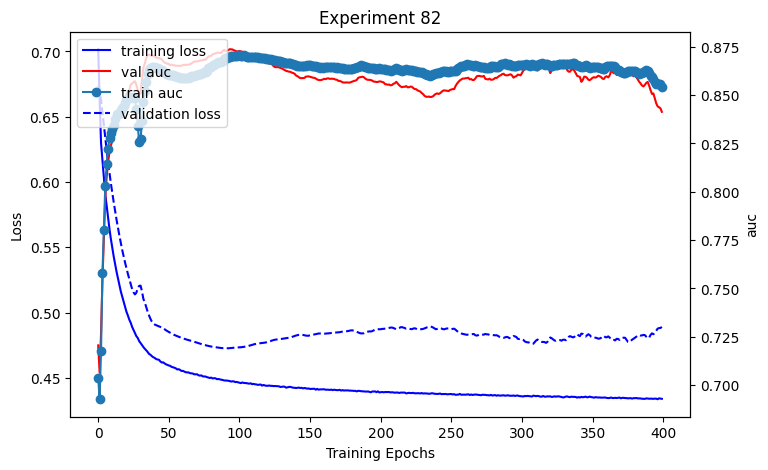

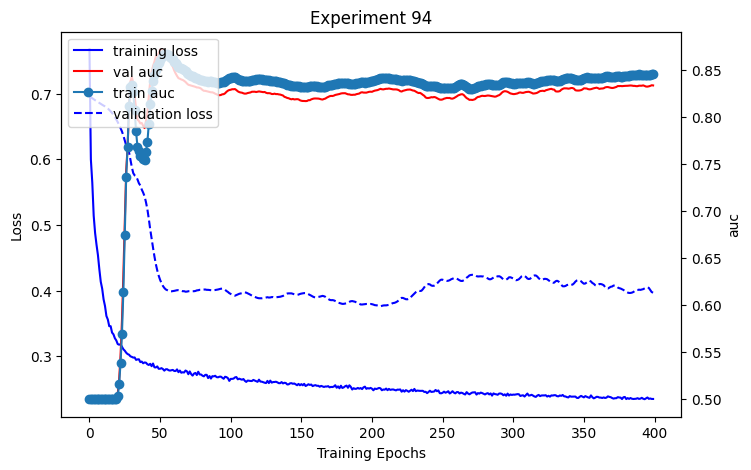

In [67]:
show_results("pre_post_process")

## L2 norm

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
43    False        True  SAGEConv           10       random               32   
44     True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
43               None              mean              mean                   2   
44               None              mean              mean                   1   

    post_process_layers  pre_process_layers    auc  
43                    1                   1  0.859  
44                    0                   0  0.779

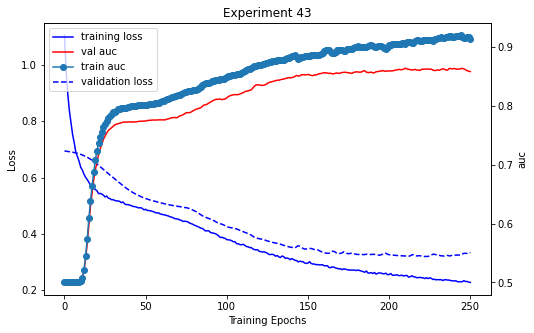

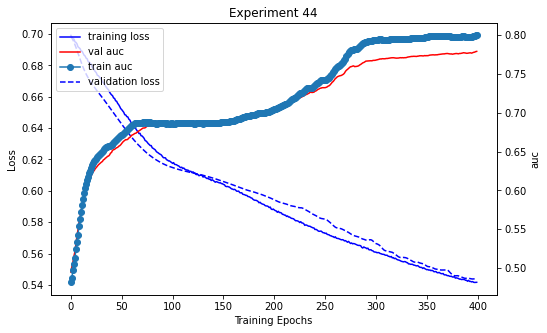

In [148]:
show_results("L2_norm")

## Pre y post

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
48     True        True  SAGEConv           10       random               32   
50     True        True  SAGEConv           10       random               32   
47     True        True  SAGEConv           10       random               32   
65     True        True  SAGEConv           10       random               32   
59     True        True  SAGEConv           10       random               32   
60     True        True  SAGEConv           10       random               32   
71     True        True  SAGEConv           10       random               32   
68     True        True  SAGEConv           10       random               32   
66     True        True  SAGEConv           10       random               32   
56     True        True  SAGEConv           10       random               32   
57     True        True  SAGEConv           10       random               32   
62     True        True  SAGEConv           10       random               32   
63     True        True  SAGEConv           10       random               32   
54     True        True  SAGEConv           10       random               32   
53     True        True  SAGEConv           10       random               32   
58     True        True  SAGEConv           10       random               32   
67     True        True  SAGEConv           10       random               32   
70     True        True  SAGEConv           10       random               32   
61     True        True  SAGEConv           10       random               32   
45     True        True  SAGEConv           10       random               32   
49     True        True  SAGEConv           10       random               32   
51     True        True  SAGEConv           10       random               32   
52     True        True  SAGEConv           10       random               32   
69     True        True  SAGEConv           10       random               32   
55     True        True  SAGEConv           10       random               32   
46     True        True  SAGEConv           10       random               32   
64     True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
48               None              mean              mean                   1   
50               None              mean              mean                   1   
47               None              mean              mean                   1   
65               None              mean              mean                   3   
59               None              mean              mean                   2   
60               None              mean              mean                   2   
71               None              mean              mean                   2   
68               None              mean              mean                   3   
66               None              mean              mean                   3   
56               None              mean              mean                   2   
57               None              mean              mean                   2   
62               None              mean              mean                   3   
63               None              mean              mean                   3   
54               None              mean              mean                   2   
53               None              mean              mean                   2   
58               None              mean              mean                   2   
67               None              mean              mean                   3   
70               None              mean              mean                   3   
61               None              mean              mean                   2   
45               None              mean              mean                   1   
49               None              mean              mean     

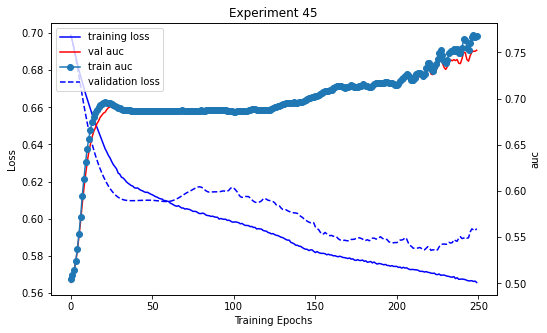

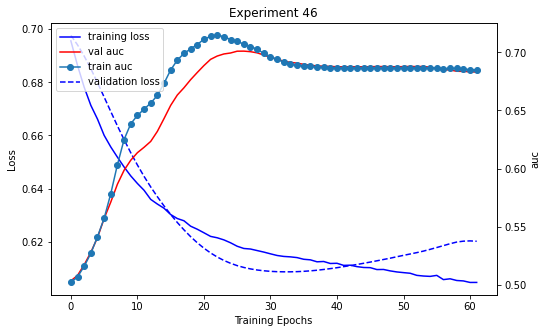

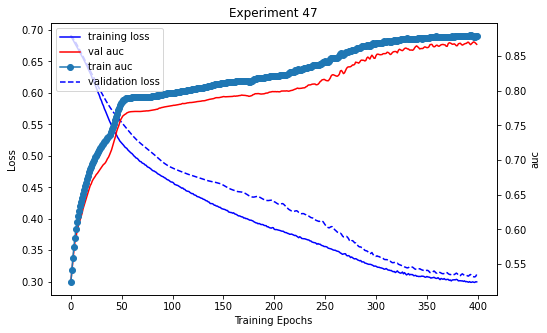

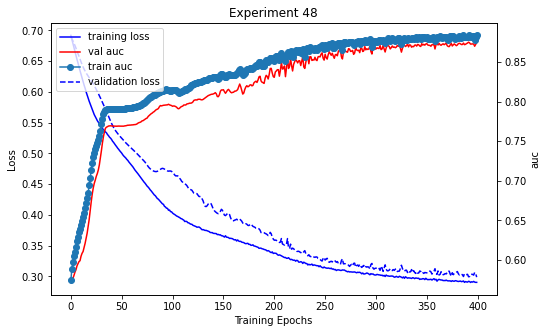

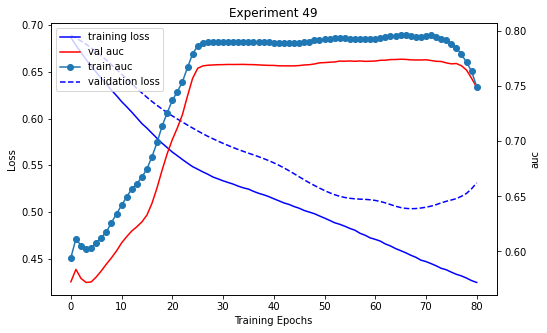

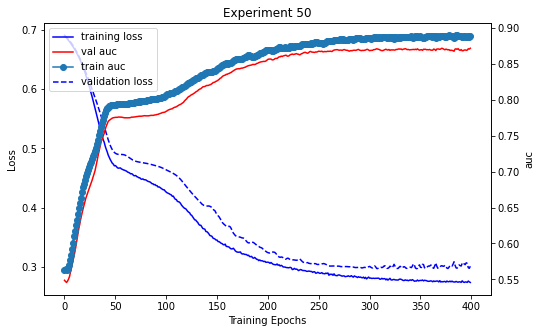

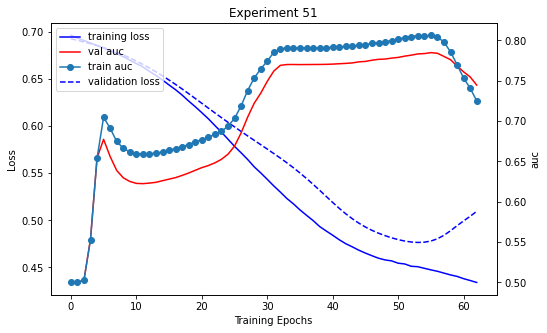

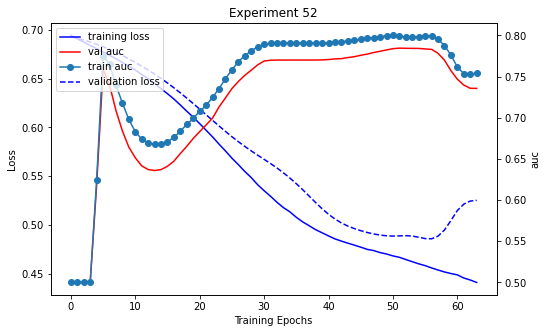

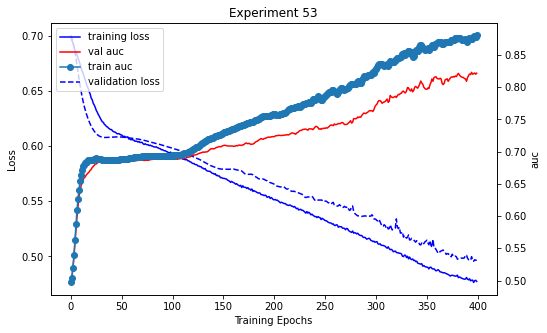

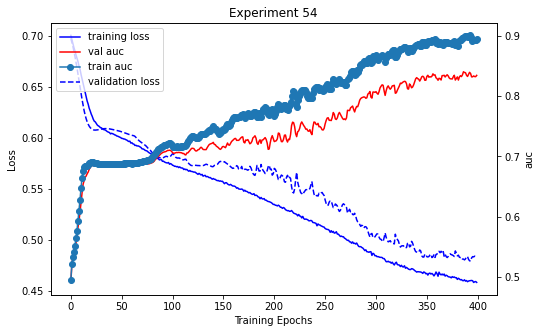

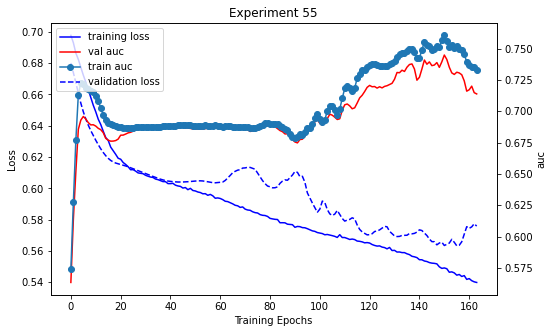

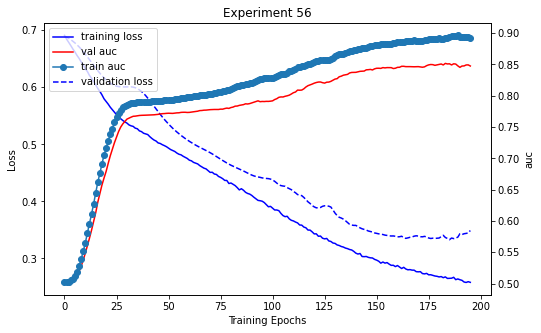

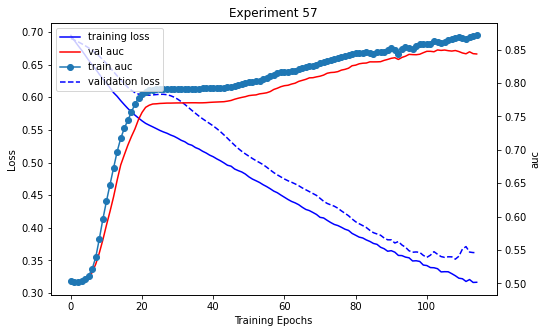

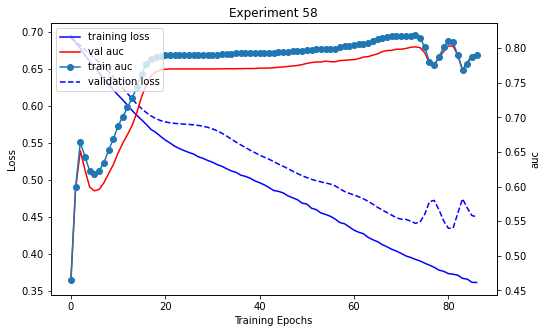

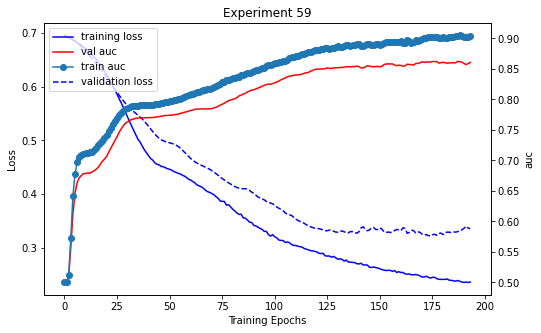

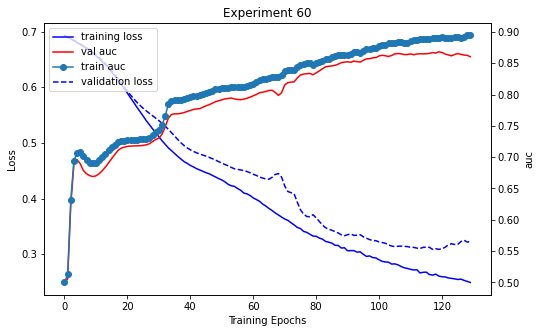

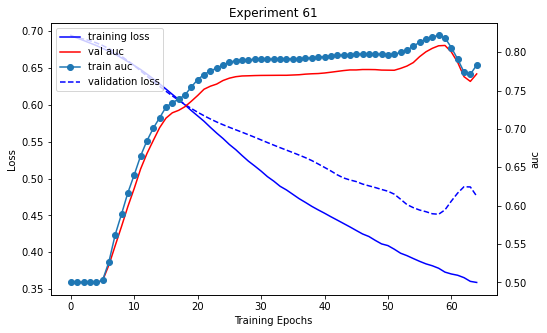

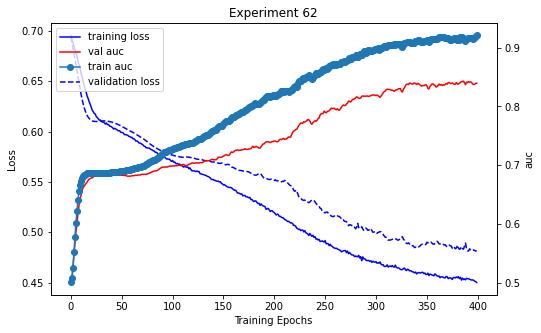

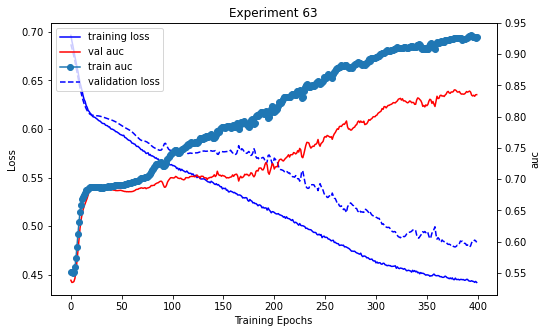

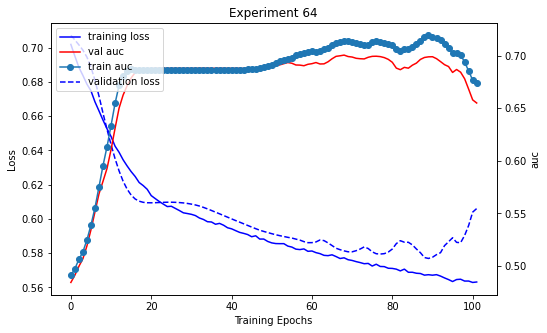

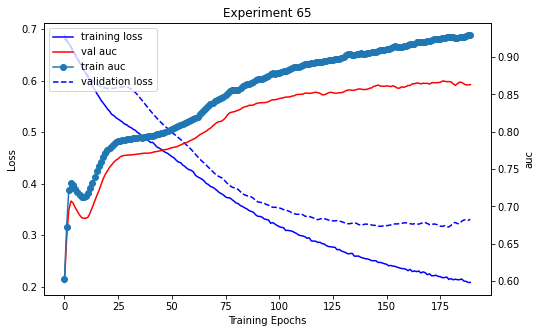

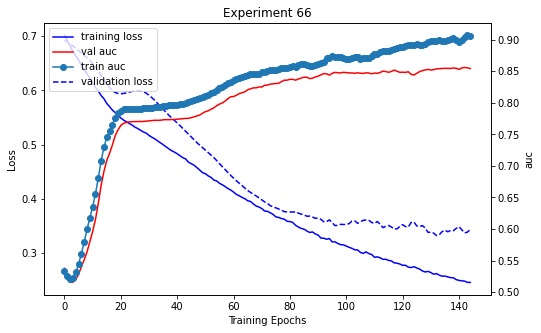

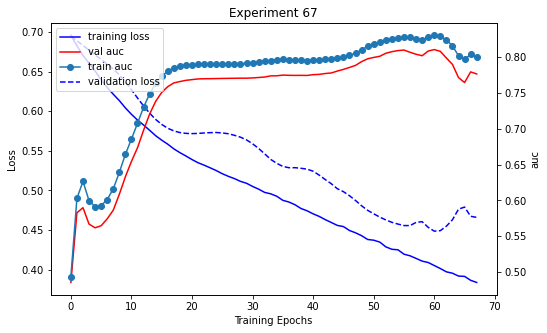

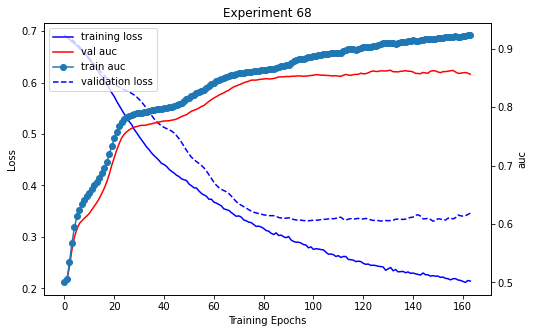

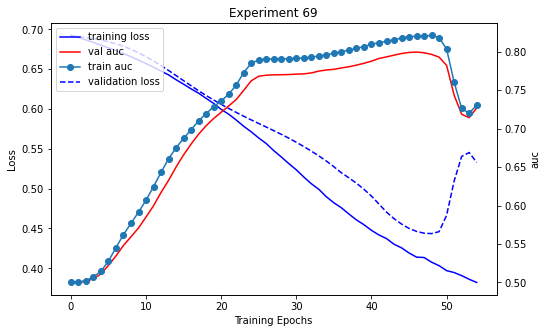

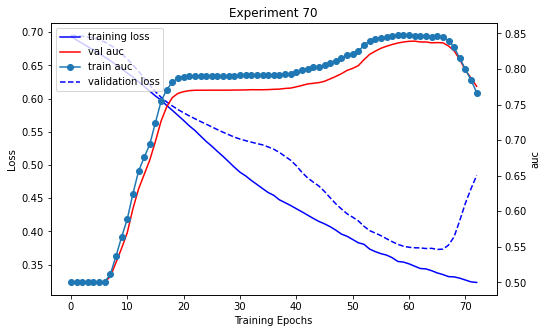

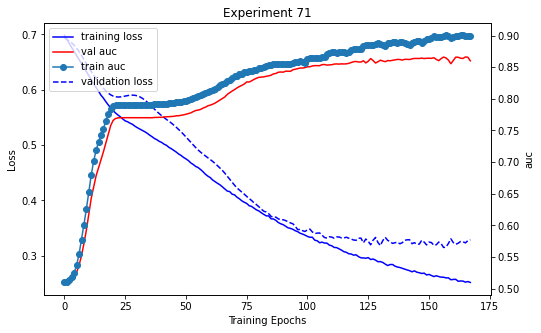

In [149]:
show_results('num_layers')

## Message passing

In [151]:
experiment_index.keys()

dict_keys(['hidden_dim', 'aggregations_conv_type', 'aggregations_feature_type', 'connectivity', 'L2_norm', 'num_layers', 'feature_dim'])

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
72     True        True  SAGEConv           10         ones               32   
74     True        True  SAGEConv           50         ones               32   
76     True        True  SAGEConv          100         ones               32   
73     True        True  SAGEConv           50       random               32   
75     True        True  SAGEConv          100       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
72               None              mean              mean                   2   
74               None              mean              mean                   2   
76               None              mean              mean                   2   
73               None              mean              mean                   2   
75               None              mean              mean                   2   

    post_process_layers  pre_process_layers    auc  
72                    1                   1  0.802  
74                    1                   1  0.800  
76                    1                   1  0.797  
73                    1                   1  0.794  
75                    1                   1  0.742

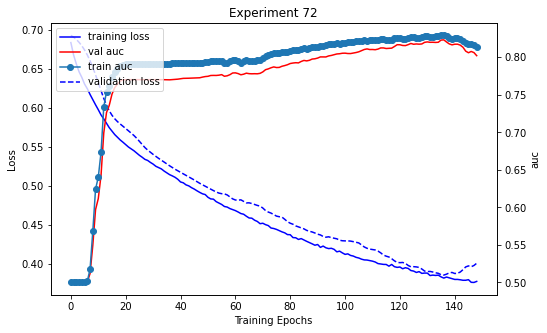

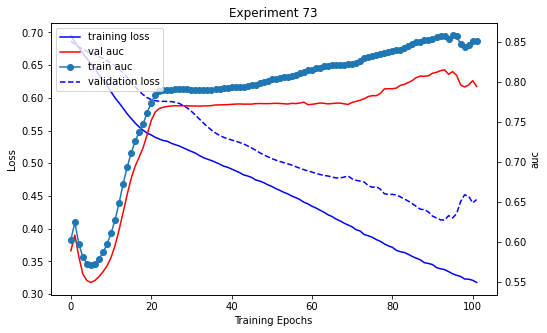

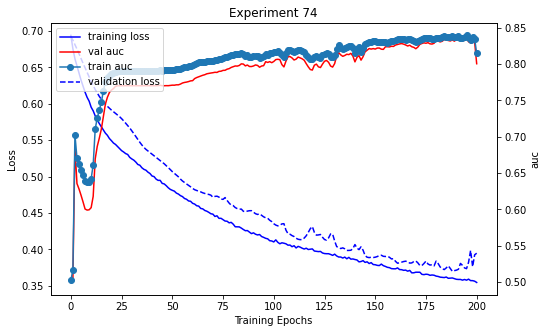

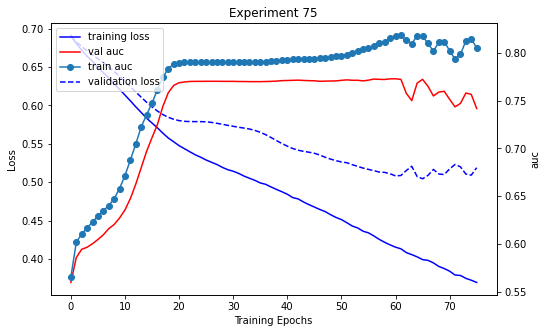

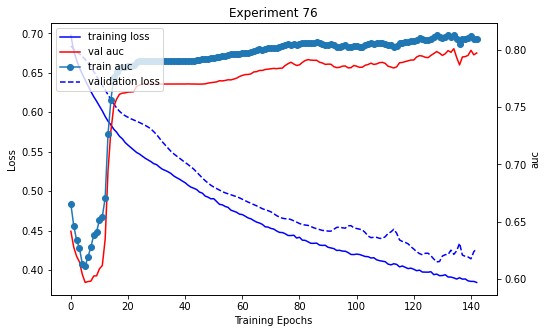

In [167]:
show_results("feature_dim")

## Feature type

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
34     True        True  SAGEConv           50         ones               32   
36     True        True  SAGEConv          100         ones               32   
32     True        True  SAGEConv           10         ones               32   
35     True        True  SAGEConv          100       random               32   
33     True        True  SAGEConv           50       random               32   
31     True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
34               None              mean               sum                   2   
36               None              mean               sum                   2   
32               None              mean               sum                   2   
35               None              mean               sum                   2   
33               None              mean               sum                   2   
31               None              mean               sum                   2   

    post_process_layers  pre_process_layers    auc  
34                    1                   1  0.906  
36                    1                   1  0.904  
32                    1                   1  0.899  
35                    1                   1  0.887  
33                    1                   1  0.886  
31                    1                   1  0.882

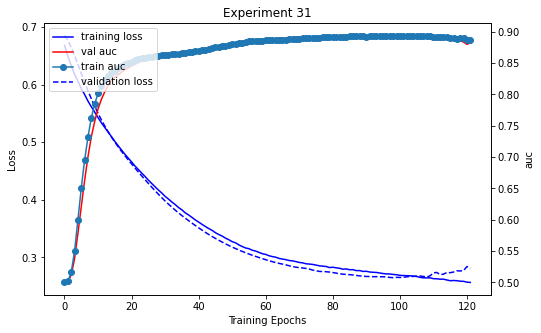

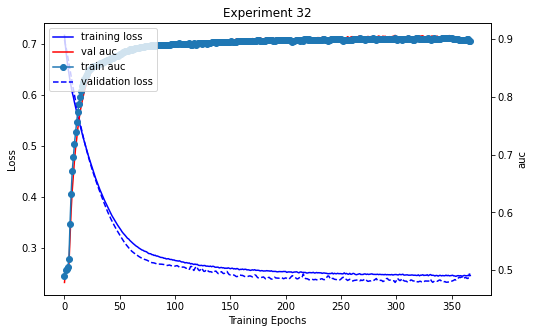

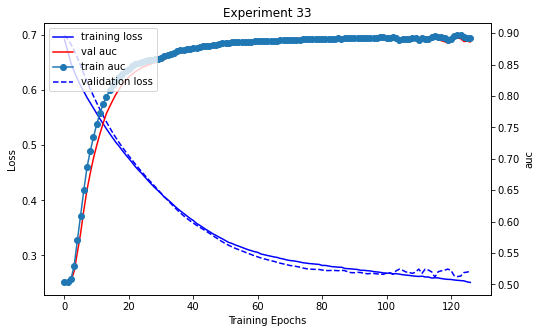

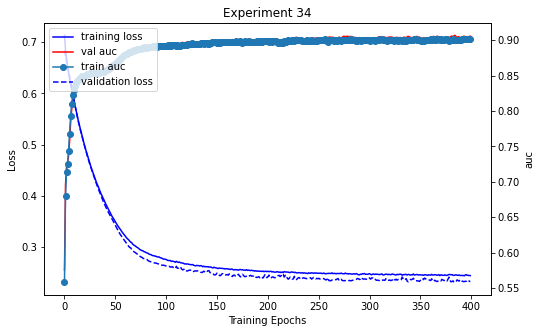

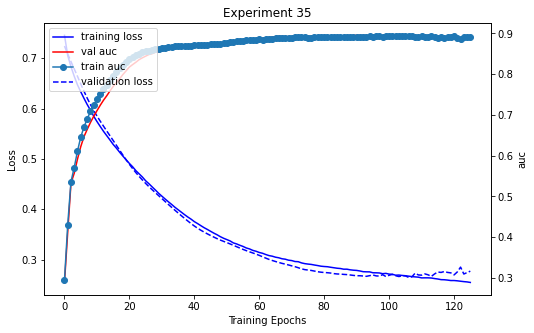

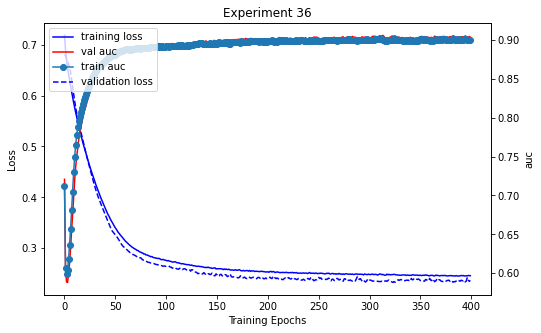

In [66]:
show_results("feature_type")

# Top 5 y worst 5

In [202]:
worst_5 = df.sort_values(by="auc")[:5].round(2)
display(worst_5)

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
64     True        True  SAGEConv           10       random               32   
46     True        True  SAGEConv           10       random               32   
55     True        True  SAGEConv           10       random               32   
2      True        True  SAGEConv           10       random              128   
69     True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
64               None              mean              mean                   3   
46               None              mean              mean                   1   
55               None              mean              mean                   2   
2                None              mean              mean                   2   
69               None              mean              mean                   3   

    post_process_layers  pre_process_layers   auc  
64                    0                   2  0.65  
46                    0                   2  0.68  
55                    0                   2  0.71  
2                     1                   1  0.72  
69                    2                   1  0.73

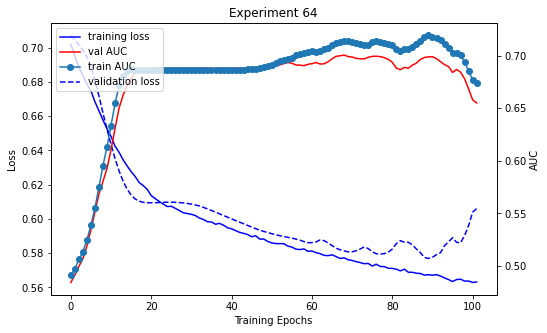

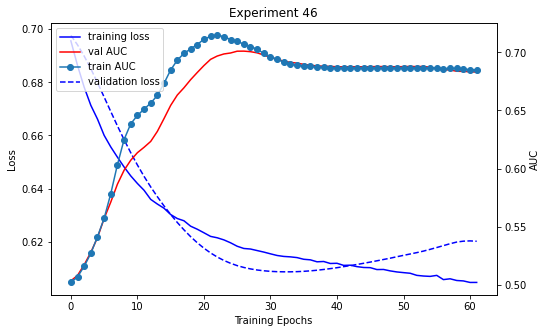

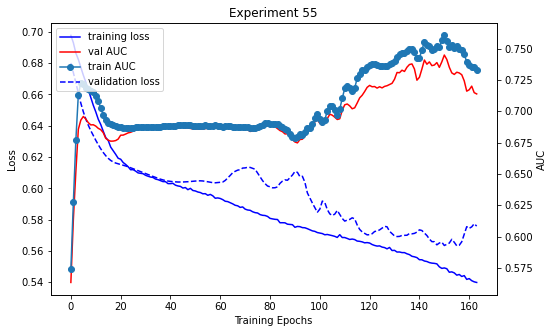

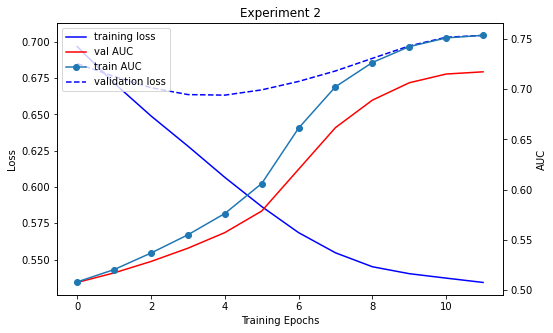

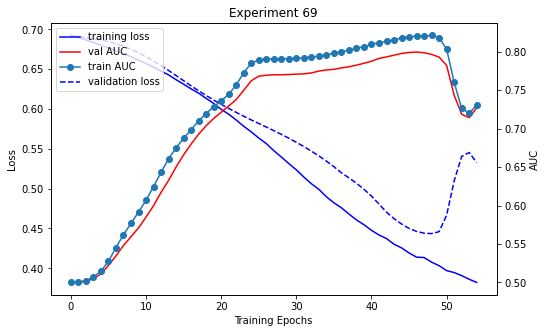

In [180]:
for experiment in worst_5.index.values:
    plot_training_stats(f"Experiment {experiment}",*results.loc[experiment,"curve_data"],"AUC")

In [206]:
top_5 = df.sort_values(by="auc", ascending=False)[:5].round(2)
display(top_5)

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
34     True        True  SAGEConv           10         ones               32   
31     True        True  SAGEConv           10         ones               32   
37     True        True  SAGEConv           10         ones               32   
10     True        True  SAGEConv           10       random               32   
7      True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
34               None               sum               sum                   2   
31               None              mean               sum                   2   
37               None               max               sum                   2   
10               None               max               sum                   2   
7                None               sum               sum                   2   

    post_process_layers  pre_process_layers   auc  
34                    1                   1  0.91  
31                    1                   1  0.90  
37                    1                   1  0.90  
10                    1                   1  0.89  
7                     1                   1  0.89

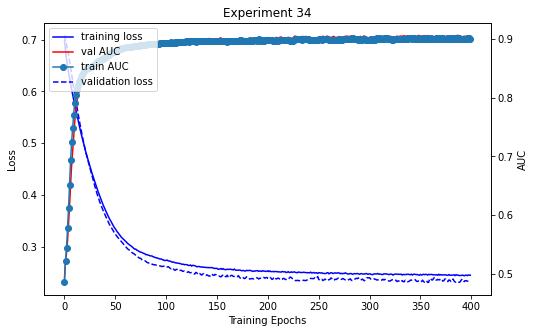

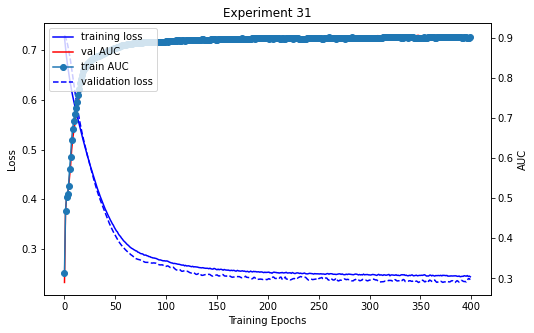

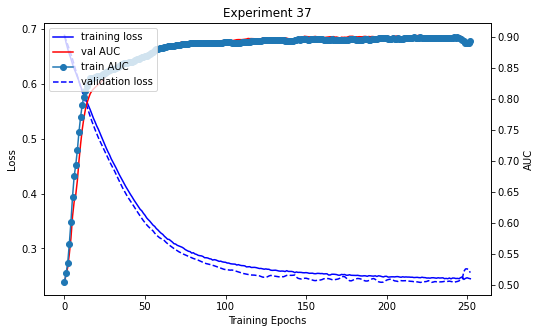

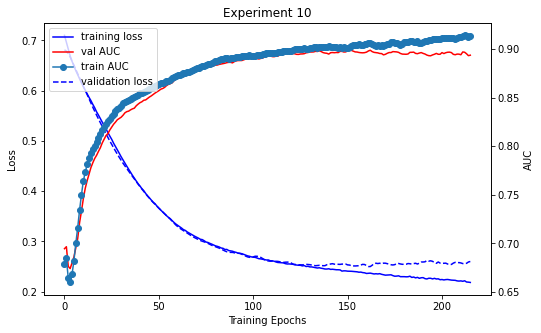

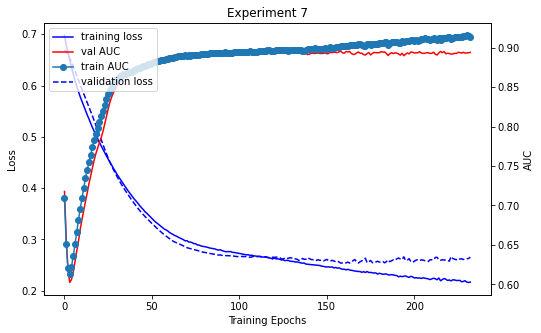

In [182]:
for experiment in top_5.index.values:
    plot_training_stats(f"Experiment {experiment}",*results.loc[experiment,"curve_data"],"AUC")

In [187]:
df[(df.msg_passing_layers == 2)&(df.pre_process_layers == 0)&(df.post_process_layers == 0)]

L2_norm  batch_norm conv_type  feature_dim feature_type  hidden_channels  \
53     True        True  SAGEConv           10       random               32   

   layer_connectivity macro_aggregation micro_aggregation  msg_passing_layers  \
53               None              mean              mean                   2   

    post_process_layers  pre_process_layers       auc  
53                    0                   0  0.821509

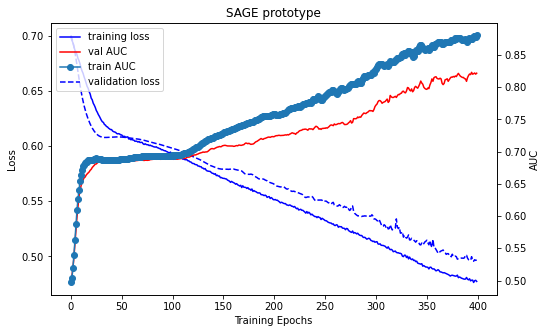

In [188]:
plot_training_stats("SAGE prototype",*results.loc[53,"curve_data"],"AUC")